In [375]:
# 相关模块导入

import warnings
warnings.filterwarnings('ignore')

import re

# 数据处理
import pandas as pd 
import numpy as np

# 绘图
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['SimHei']

import sklearn
from scipy.cluster import hierarchy
from scipy.spatial.distance import cdist
from sklearn import cluster,preprocessing
from sklearn.decomposition import PCA

# 机器学习模型搭建
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split  # 数据划分
from sklearn.ensemble import RandomForestClassifier as RandomForest # 随机森林
from sklearn.metrics import accuracy_score  # 评价指标集合包
import sklearn
from scipy.cluster import hierarchy
from scipy.spatial.distance import cdist
from sklearn import cluster,preprocessing
from sklearn.decomposition import PCA

import xgboost as xgb # XGBoost

from sklearn.model_selection import RandomizedSearchCV  # 随即参数搜索
from sklearn.model_selection import GridSearchCV        # 网格搜索
from sklearn.model_selection import KFold # k折交叉，默认为5折交叉

from sklearn.ensemble import RandomForestClassifier  
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC # SVM


# 数据导入

In [158]:
# 导入数据
data = pd.read_csv('D:/学习专区/比赛专题/数维杯/ADNIMERGE_New.csv')
data.head()

,RID,COLPROT,ORIGPROT,PTID,SITE,VISCODE,EXAMDATE,DX_bl,AGE,PTGENDER,...,PTAU_bl,FDG_bl,PIB_bl,AV45_bl,FBB_bl,Years_bl,Month_bl,Month,M,update_stamp
0,2,ADNI1,ADNI1,011_S_0002,11,bl,2005-9-8,CN,74.3,Male,...,NaN,1.33615,NaN,NaN,NaN,0.000000,0.00000,0,0,58:48.0
1,3,ADNI1,ADNI1,011_S_0003,11,bl,2005-9-12,AD,81.3,Male,...,22.83,1.10860,NaN,NaN,NaN,0.000000,0.00000,0,0,58:48.0
2,3,ADNI1,ADNI1,011_S_0003,11,m06,2006-3-13,AD,81.3,Male,...,22.83,1.10860,NaN,NaN,NaN,0.498289,5.96721,6,6,58:48.0
3,3,ADNI1,ADNI1,011_S_0003,11,m12,2006-9-12,AD,81.3,Male,...,22.83,1.10860,NaN,NaN,NaN,0.999316,11.96720,12,12,58:48.0
4,3,ADNI1,ADNI1,011_S_0003,11,m24,2007-9-12,AD,81.3,Male,...,22.83,1.10860,NaN,NaN,NaN,1.998630,23.93440,24,24,58:48.0


# 数据预处理    

In [19]:
# 查看 行列的数量和属性信息
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16222 entries, 0 to 16221
Columns: 116 entries, RID to update_stamp
dtypes: float64(88), int64(5), object(23)
memory usage: 14.4+ MB


In [18]:
# 查看各列的变量属性
data.dtypes

RID               int64
COLPROT          object
ORIGPROT         object
PTID             object
SITE              int64
                 ...   
Years_bl        float64
Month_bl        float64
Month             int64
M                 int64
update_stamp     object
Length: 116, dtype: object

In [20]:
# 查看重复数据
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
16217    False
16218    False
16219    False
16220    False
16221    False
Length: 16222, dtype: bool

In [25]:
# 查看 每一个数据的缺失情况
data.isnull()

,RID,COLPROT,ORIGPROT,PTID,SITE,VISCODE,EXAMDATE,DX_bl,AGE,PTGENDER,...,PTAU_bl,FDG_bl,PIB_bl,AV45_bl,FBB_bl,Years_bl,Month_bl,Month,M,update_stamp
0,False,False,False,False,False,False,False,False,False,False,...,True,False,True,True,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16217,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,False,False,False,False
16218,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,False,False,False,False
16219,False,False,False,False,False,False,False,False,False,False,...,True,False,True,False,True,False,False,False,False,False
16220,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False


In [27]:
# 查看每一列数据的缺失情况
for i in data.isnull().any():
    print(i)

False
False
False
False
False
False
False
True
True
False
False
False
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
False
False
False
False


In [29]:
# 每个数据缺失值查看

data.isnull()

,RID,COLPROT,ORIGPROT,PTID,SITE,VISCODE,EXAMDATE,DX_bl,AGE,PTGENDER,...,PTAU_bl,FDG_bl,PIB_bl,AV45_bl,FBB_bl,Years_bl,Month_bl,Month,M,update_stamp
0,False,False,False,False,False,False,False,False,False,False,...,True,False,True,True,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16217,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,False,False,False,False
16218,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,False,False,False,False,False,False
16219,False,False,False,False,False,False,False,False,False,False,...,True,False,True,False,True,False,False,False,False,False
16220,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False


In [30]:
# 查看每列缺失值情况
data.isnull().any()

RID             False
COLPROT         False
ORIGPROT        False
PTID            False
SITE            False
                ...  
Years_bl        False
Month_bl        False
Month           False
M               False
update_stamp    False
Length: 116, dtype: bool

In [31]:
# 缺失数量计数
data.isnull().sum()

RID             0
COLPROT         0
ORIGPROT        0
PTID            0
SITE            0
               ..
Years_bl        0
Month_bl        0
Month           0
M               0
update_stamp    0
Length: 116, dtype: int64

In [32]:
# 细化计数    

for i in data.columns:
    print(i, data[i].isnull().sum())

RID 0
COLPROT 0
ORIGPROT 0
PTID 0
SITE 0
VISCODE 0
EXAMDATE 0
DX_bl 14
AGE 9
PTGENDER 0
PTEDUCAT 0
PTETHCAT 0
PTRACCAT 0
PTMARRY 1
APOE4 315
FDG 12529
PIB 15999
AV45 13142
FBB 15708
ABETA 13852
TAU 13852
PTAU 13853
CDRSB 4588
ADAS11 4879
ADAS13 4978
ADASQ4 4844
MMSE 4840
RAVLT_immediate 4964
RAVLT_learning 4963
RAVLT_forgetting 4995
RAVLT_perc_forgetting 5068
LDELTOTAL 6869
DIGITSCOR 12422
TRABSCOR 5293
FAQ 4595
MOCA 8879
EcogPtMem 8555
EcogPtLang 8571
EcogPtVisspat 8650
EcogPtPlan 8589
EcogPtOrgan 8728
EcogPtDivatt 8627
EcogPtTotal 8564
EcogSPMem 8522
EcogSPLang 8516
EcogSPVisspat 8694
EcogSPPlan 8605
EcogSPOrgan 8847
EcogSPDivatt 8720
EcogSPTotal 8524
FLDSTRENG 8563
FSVERSION 6288
IMAGEUID 6288
Ventricles 6879
Hippocampus 7541
WholeBrain 6626
Entorhinal 7954
Fusiform 7954
MidTemp 7954
ICV 6294
DX 4858
mPACCdigit 4838
mPACCtrailsB 4832
EXAMDATE_bl 0
CDRSB_bl 0
ADAS11_bl 36
ADAS13_bl 108
ADASQ4_bl 6
MMSE_bl 1
RAVLT_immediate_bl 40
RAVLT_learning_bl 40
RAVLT_forgetting_bl 42
RAVLT_perc_

In [ ]:
# # 采用均值填补法    
# imp = SimpleImputer(strategy='mean')
# data['EcogSPOrgan_bl'] = imp.fit_transform(data['EcogSPOrgan_bl'].to_frame())

# data.info()

In [36]:
# 缺失值处理(采用均值填充)

columns_with_na=[]

for column in data:
    if data[column].isnull().any()==True:
        columns_with_na.append(column)

# 平均值填充
data_ = data
for i in columns_with_na:
    if data[i].dtype=='float64':
        data_[i] = data[i].fillna(data[i].mean())
    else: #对于非数字数据
        data_[i] = data[i].fillna(data[i].mode()[0])
        
np.any(pd.isnull(data_)) # 确认 meandf 现在是无 Nan 的

False

In [151]:
data_['DX_bl'].value_counts()

LMCI    5250
CN      4850
EMCI    2968
AD      1738
SMC     1416
Name: DX_bl, dtype: int64

In [96]:
# 将五个类别转为 两个类别，即五分类问题转为二分类（即，只判断是否患病）

#    label标签列值转换

mapping = {
           'CN': 0,
           'AD': 1,
           'LMCI': 1,
           'EMCI':1,
           'SMC':1
}

data3 = data_
data3['DX_bl'] =data3['DX_bl'].map(mapping)


In [97]:
data3['DX_bl'].value_counts()

1    11372
0     4850
Name: DX_bl, dtype: int64

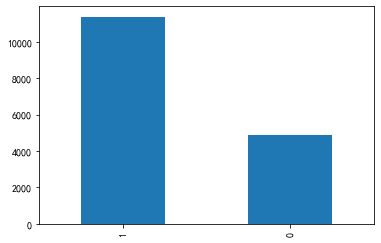

In [98]:
#  柱状图展示 分布信息

data3['DX_bl'].value_counts().plot.bar()

In [89]:
data_['DX_bl'].value_counts()

LMCI    5250
CN      4850
EMCI    2968
AD      1738
SMC     1416
Name: DX_bl, dtype: int64

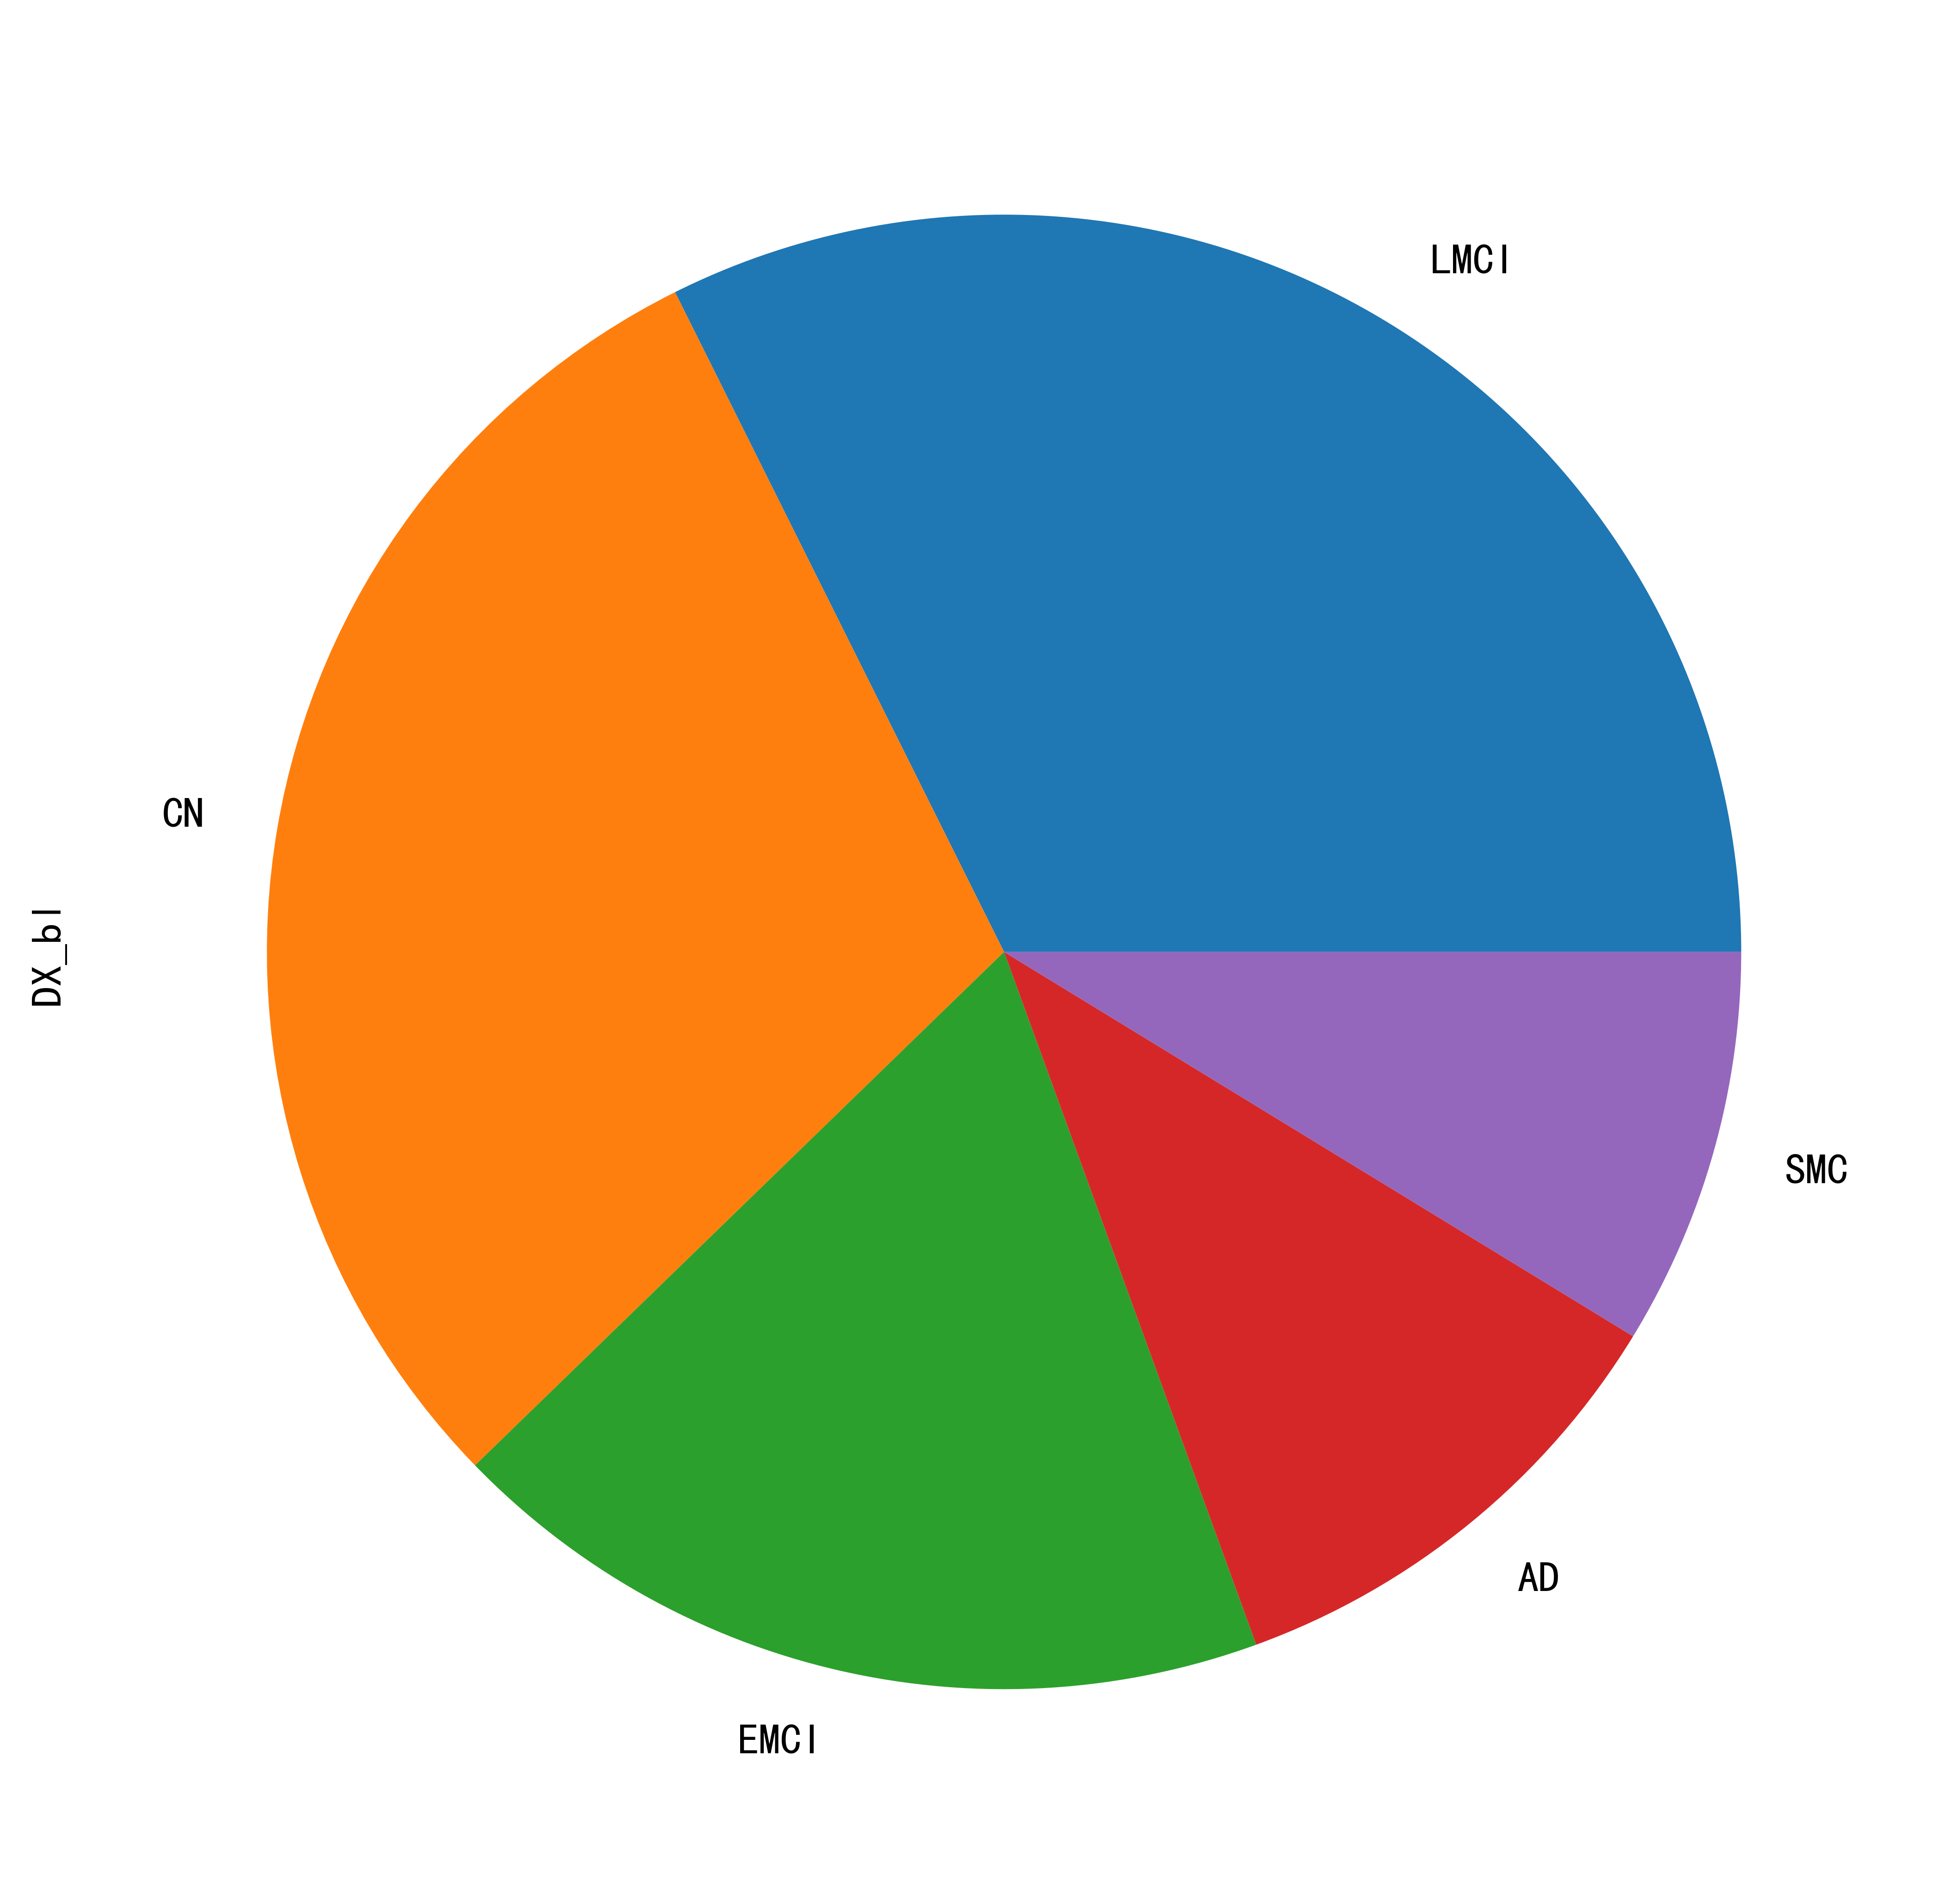

In [95]:
# 饼图 展示数据中 病患类型的分布情况
plt.figure(figsize=(10,8),dpi=660)
data_['DX_bl'].value_counts().plot.pie()

[Text(0, 0, 'female'), Text(0, 0, 'male')]

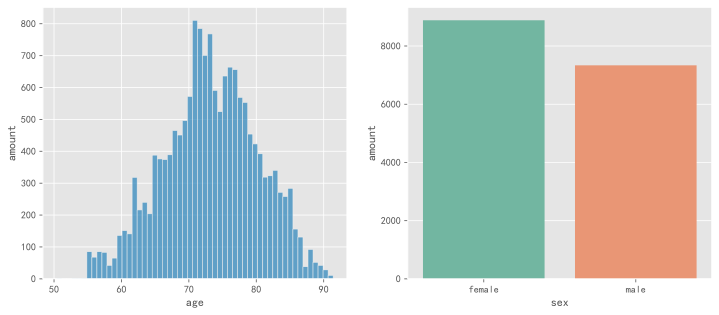

In [269]:
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.rcParams['font.sans-serif'] = ['simhei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False    #用来正常显示负号

# 定义 genders 列
genders = ['female','male']
fig,[ax1,ax2] = plt.subplots(1,2,figsize=(12,5))

# 画出年龄分布直方图
sns.histplot(data_['AGE'],kde = False,palette='Set2',ax=ax1)
# 画出性别分布柱状图
sns.countplot(x='PTGENDER',data=data_,palette='Set2',ax=ax2)

ax1.set(xlabel = 'age',ylabel = 'amount')
ax2.set(xlabel = 'sex',ylabel = 'amount')
ax2.set_xticklabels(genders)

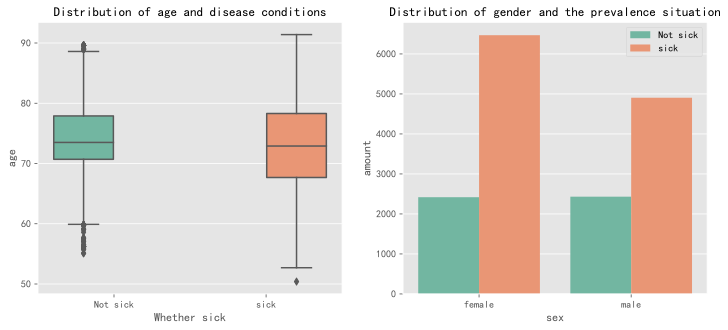

In [270]:
#     年龄、性别 与患病的分布情况
# 对是否患病中的年龄、性别的分布情况进行大致描述，使用的方法为箱线图和柱状图

#定义两个图像
fig,[ax1,ax2] = plt.subplots(1,2,figsize = (12,5))

#绘制年龄箱线图
sns.boxplot(x='DX_bl',y='AGE',hue='DX_bl',data=data3,palette='Set2',ax=ax1)
#绘制性别柱状图
sns.countplot(x='PTGENDER',hue='DX_bl',data=data3,palette='Set2',ax=ax2)

# 给图像加标题
ax1.set_title('Distribution of age and disease conditions',fontsize=13)
ax2.set_title('Distribution of gender and the prevalence situation',fontsize=13)

# 给图像加标签
labels = ['Not sick','sick']
ax1.set(xlabel='Whether sick',ylabel='age')
ax1.set_xticklabels(labels)
ax1.legend_.remove()  # 取消图例
ax2.set(xlabel='sex',ylabel='amount')
ax2.set_xticklabels(genders)
ax2.legend(labels)

plt.show()

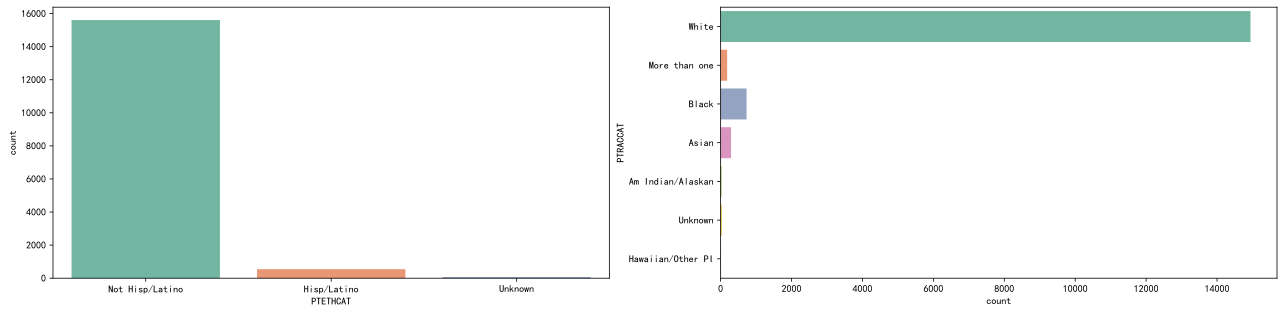

In [111]:
# 画出种族，人种分布柱状图，条形图

fig,[ax1,ax2] = plt.subplots(1,2,figsize = (22,5))


sns.countplot(x='PTETHCAT',data=data_,palette='Set2',ax=ax1)
sns.countplot(y='PTRACCAT',data=data_,palette='Set2',ax=ax2)

In [161]:
# 进一步数据处理，  特征选择

data_bl = data_.loc[data_['VISCODE']=='bl'] # 因为 bl是基准，所以只读取bl，其它数据不要读取

#ADNIMERGE 在末尾附近包含两个变量，称为“Month”和“M”，它们彼此相同，并且对于 VISCODE 也是冗余的。
#删除“M”但保留“Month”，以防它对纵向分析中的解析有用。同时删除那些带有后缀“_bl”的变量
#，因为这
#     些变量在我们的分析中是多余的，为多余的数据，因为我们只需要对基线数据，即实际的数据进行分析。


data_bl = data_bl.drop('M', axis=1) 

# 删除多余的列值
data_bl = data_bl.drop(['EXAMDATE_bl', 'CDRSB_bl', 'ADAS11_bl', 'ADAS13_bl', 'MMSE_bl',
       'RAVLT_immediate_bl', 'RAVLT_learning_bl', 'RAVLT_forgetting_bl',
       'RAVLT_perc_forgetting_bl', 'FAQ_bl', 'Ventricles_bl',
       'Hippocampus_bl', 'WholeBrain_bl', 'Entorhinal_bl', 'Fusiform_bl',
       'MidTemp_bl', 'ICV_bl', 'MOCA_bl', 'EcogPtMem_bl', 'EcogPtLang_bl',
       'EcogPtVisspat_bl', 'EcogPtPlan_bl', 'EcogPtOrgan_bl',
       'EcogPtDivatt_bl', 'EcogPtTotal_bl', 'EcogSPMem_bl',
       'EcogSPLang_bl', 'EcogSPVisspat_bl', 'EcogSPPlan_bl',
       'EcogSPOrgan_bl', 'EcogSPDivatt_bl', 'EcogSPTotal_bl', 'FDG_bl',
       'AV45_bl', 'Years_bl', 'Month_bl'], axis=1)

#  处理后的数据
data_bl.head()

,RID,COLPROT,ORIGPROT,PTID,SITE,VISCODE,EXAMDATE,DX_bl,AGE,PTGENDER,...,FLDSTRENG_bl,FSVERSION_bl,IMAGEUID_bl,ABETA_bl,TAU_bl,PTAU_bl,PIB_bl,FBB_bl,Month,update_stamp
0,2,ADNI1,ADNI1,011_S_0002,11,bl,2005-9-8,CN,74.3,Male,...,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,35475.0,>1700,211.8,18.85,1.582256,1.163628,0,58:48.0
1,3,ADNI1,ADNI1,011_S_0003,11,bl,2005-9-12,AD,81.3,Male,...,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,32237.0,741.5,239.7,22.83,1.582256,1.163628,0,58:48.0
5,4,ADNI1,ADNI1,022_S_0004,22,bl,2005-11-8,LMCI,67.5,Male,...,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,64631.0,1501.0,153.1,13.29,1.582256,1.163628,0,01:40.0
10,5,ADNI1,ADNI1,011_S_0005,11,bl,2005-9-7,CN,73.7,Male,...,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,32246.0,547.3,337.0,33.43,1.582256,1.163628,0,58:48.0
15,6,ADNI1,ADNI1,100_S_0006,100,bl,2005-11-29,LMCI,80.4,Female,...,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,33025.0,>1700,211.8,18.85,1.582256,1.163628,0,01:40.0


In [39]:
# 查看 各个(病患)类型的分布情况

data_bl['DX_bl'].value_counts()

LMCI    701
CN      541
EMCI    421
AD      411
SMC     351
Name: DX_bl, dtype: int64

In [41]:
# 查看 各个人种分布情况

data_bl['PTRACCAT'].value_counts()

White                2141
Black                 178
Asian                  58
More than one          30
Unknown                11
Am Indian/Alaskan       5
Hawaiian/Other PI       2
Name: PTRACCAT, dtype: int64

In [43]:
# 查看 数据的 行列情况

data_bl.shape

(2425, 79)

In [44]:
# 查看 新数据的 缺失值情况

for i in data_bl.columns:
    print(i, data_bl[i].isnull().sum())

RID 0
COLPROT 0
ORIGPROT 0
PTID 0
SITE 0
VISCODE 0
EXAMDATE 0
DX_bl 0
AGE 0
PTGENDER 0
PTEDUCAT 0
PTETHCAT 0
PTRACCAT 0
PTMARRY 0
APOE4 0
FDG 0
PIB 0
AV45 0
FBB 0
ABETA 0
TAU 0
PTAU 0
CDRSB 0
ADAS11 0
ADAS13 0
ADASQ4 0
MMSE 0
RAVLT_immediate 0
RAVLT_learning 0
RAVLT_forgetting 0
RAVLT_perc_forgetting 0
LDELTOTAL 0
DIGITSCOR 0
TRABSCOR 0
FAQ 0
MOCA 0
EcogPtMem 0
EcogPtLang 0
EcogPtVisspat 0
EcogPtPlan 0
EcogPtOrgan 0
EcogPtDivatt 0
EcogPtTotal 0
EcogSPMem 0
EcogSPLang 0
EcogSPVisspat 0
EcogSPPlan 0
EcogSPOrgan 0
EcogSPDivatt 0
EcogSPTotal 0
FLDSTRENG 0
FSVERSION 0
IMAGEUID 0
Ventricles 0
Hippocampus 0
WholeBrain 0
Entorhinal 0
Fusiform 0
MidTemp 0
ICV 0
DX 0
mPACCdigit 0
mPACCtrailsB 0
ADASQ4_bl 0
LDELTOTAL_BL 0
DIGITSCOR_bl 0
TRABSCOR_bl 0
mPACCdigit_bl 0
mPACCtrailsB_bl 0
FLDSTRENG_bl 0
FSVERSION_bl 0
IMAGEUID_bl 0
ABETA_bl 0
TAU_bl 0
PTAU_bl 0
PIB_bl 0
FBB_bl 0
Month 0
update_stamp 0


In [45]:
# 根据各个类型的缺失值数量 和已知的资料 总结决定，我们选取缺失值较少的特征作为 特征变量
data2 = data_bl[['AGE','PTGENDER','PTEDUCAT','PTRACCAT','MMSE','ADAS11','ADAS13','RAVLT_immediate','RAVLT_learning','RAVLT_forgetting',
                 'RAVLT_perc_forgetting','FAQ','mPACCdigit','ADASQ4_bl','LDELTOTAL_BL','DX_bl']]

data2.head()

,AGE,PTGENDER,PTEDUCAT,PTRACCAT,MMSE,ADAS11,ADAS13,RAVLT_immediate,RAVLT_learning,RAVLT_forgetting,RAVLT_perc_forgetting,FAQ,mPACCdigit,ADASQ4_bl,LDELTOTAL_BL,DX_bl
0,74.3,Male,16,White,28.0,10.67,18.67,44.0,4.0,6.0,54.5455,0.0,-4.31670,5.0,10.0,CN
1,81.3,Male,18,White,20.0,22.00,31.00,22.0,1.0,4.0,100.0000,10.0,-16.29050,8.0,2.0,AD
5,67.5,Male,10,White,27.0,14.33,21.33,37.0,7.0,4.0,36.3636,0.0,-8.43305,6.0,4.0,LMCI
10,73.7,Male,16,White,29.0,8.67,14.67,37.0,4.0,4.0,44.4444,0.0,-1.89018,4.0,12.0,CN
15,80.4,Female,13,White,25.0,18.67,25.67,30.0,1.0,5.0,83.3333,0.0,-10.16300,7.0,3.0,LMCI


In [47]:
# 查看新数据缺失 情况

data2.isnull().any()

AGE                      False
PTGENDER                 False
PTEDUCAT                 False
PTRACCAT                 False
MMSE                     False
ADAS11                   False
ADAS13                   False
RAVLT_immediate          False
RAVLT_learning           False
RAVLT_forgetting         False
RAVLT_perc_forgetting    False
FAQ                      False
mPACCdigit               False
ADASQ4_bl                False
LDELTOTAL_BL             False
DX_bl                    False
dtype: bool

# 特征工程

In [ ]:
# 对字符类型数据 进行数字化编码

# from sklearn.preprocessing import LabelEncoder
# #数字化编码
# le = LabelEncoder()

# data2['DX_bl'] = le.fit_transform(data2['DX_bl'][:])

# data2.head()

In [48]:
# 对相关数据进行映射编码   

mapping = {
           'CN': 0,
           'AD': 1,
           'LMCI': 2,
           'EMCI':3,
           'SMC':4
}

mapping2 = {
           'Male': 0,
           'Female': 1
}

mapping3 = {
           'White': 0,
           'Black': 1,
            'Asian':2,
             'More than one':3,
    'Unknown':4,
    'Am Indian/Alaskan':5,
    'Hawaiian/Other PI':6
}

data2['DX_bl'] =data2['DX_bl'].map(mapping)
data2['PTGENDER'] =data2['PTGENDER'].map(mapping2)
data2['PTRACCAT'] =data2['PTRACCAT'].map(mapping3)
data2.head()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

,AGE,PTGENDER,PTEDUCAT,PTRACCAT,MMSE,ADAS11,ADAS13,RAVLT_immediate,RAVLT_learning,RAVLT_forgetting,RAVLT_perc_forgetting,FAQ,mPACCdigit,ADASQ4_bl,LDELTOTAL_BL,DX_bl
0,74.3,0,16,0,28.0,10.67,18.67,44.0,4.0,6.0,54.5455,0.0,-4.31670,5.0,10.0,0
1,81.3,0,18,0,20.0,22.00,31.00,22.0,1.0,4.0,100.0000,10.0,-16.29050,8.0,2.0,1
5,67.5,0,10,0,27.0,14.33,21.33,37.0,7.0,4.0,36.3636,0.0,-8.43305,6.0,4.0,2
10,73.7,0,16,0,29.0,8.67,14.67,37.0,4.0,4.0,44.4444,0.0,-1.89018,4.0,12.0,0
15,80.4,1,13,0,25.0,18.67,25.67,30.0,1.0,5.0,83.3333,0.0,-10.16300,7.0,3.0,2


In [49]:
# 查看 数据的描述性统计信息

data2.describe()

,AGE,PTGENDER,PTEDUCAT,PTRACCAT,MMSE,ADAS11,ADAS13,RAVLT_immediate,RAVLT_learning,RAVLT_forgetting,RAVLT_perc_forgetting,FAQ,mPACCdigit,ADASQ4_bl,LDELTOTAL_BL,DX_bl
count,2425.000000,2425.000000,2425.000000,2425.000000,2425.000000,2425.000000,2425.000000,2425.000000,2425.000000,2425.000000,2425.000000,2425.000000,2425.000000,2425.000000,2425.000000,2425.000000
mean,72.909857,0.476289,16.052371,0.191753,27.375585,10.100518,15.839260,36.654798,4.463172,4.281115,55.469107,3.807117,-5.438493,4.978209,7.792038,1.847423
std,7.371796,0.499540,2.730493,0.630573,2.652056,6.520446,9.483903,12.745740,2.771797,2.681730,36.663697,6.010287,6.244484,2.949270,5.402079,1.338616
min,50.400000,0.000000,4.000000,0.000000,16.000000,0.000000,0.000000,0.000000,-4.000000,-28.000000,-400.000000,0.000000,-23.690000,0.000000,0.000000,0.000000
25%,67.900000,0.000000,14.000000,0.000000,26.000000,5.330000,8.670000,27.000000,2.000000,3.000000,26.666700,0.000000,-9.930690,3.000000,3.000000,1.000000
50%,72.900000,0.000000,16.000000,0.000000,28.000000,8.670000,14.000000,36.000000,4.000000,4.000000,55.555600,1.000000,-4.192420,5.000000,8.000000,2.000000
75%,78.100000,1.000000,18.000000,0.000000,29.000000,13.330000,21.670000,46.000000,6.000000,6.000000,100.000000,5.189645,-0.479383,7.000000,12.000000,3.000000
max,91.400000,1.000000,20.000000,6.000000,30.000000,42.670000,54.670000,71.000000,12.000000,15.000000,100.000000,30.000000,6.304090,10.000000,23.000000,4.000000


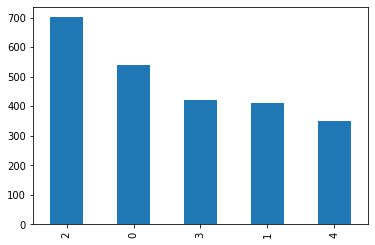

In [57]:
# 绘制柱状图 观察病患类别分布情况

data2['DX_bl'].value_counts().plot.bar()

In [64]:
# 特征构造

x = data2.drop(['DX_bl'],axis=1)
y = data2['DX_bl']

#  数据集划分

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)


In [65]:
# 特征缩放，数据标准化，归一化

from sklearn.preprocessing import StandardScaler

sca = StandardScaler()
x_train = sca.fit_transform(x_train)
x_test = sca.transform(x_test)

# 模型搭建

In [66]:
# 随机森林模型搭建

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(x_train, y_train) # 训练模型
y_pred = rfc.predict(x_test)

In [67]:
# 评价指标 进行评估

from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print("Classification Report:",)
print (report)
ac = accuracy_score(y_test,y_pred)
print("Accuracy:",ac)

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.79      0.65        94
           1       0.87      0.81      0.84        89
           2       0.87      0.91      0.89       144
           3       0.75      0.77      0.76        81
           4       0.55      0.23      0.33        77

    accuracy                           0.74       485
   macro avg       0.72      0.70      0.69       485
weighted avg       0.73      0.74      0.72       485

Accuracy: 0.7360824742268042


In [68]:
importances = rfc.feature_importances_
labels =  data2.columns[:-1]
indices = np.argsort(importances)[::-1]
for f in range(x_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, labels[indices[f]], importances[indices[f]]))

 1) LDELTOTAL_BL                   0.185977
 2) mPACCdigit                     0.148320
 3) FAQ                            0.081212
 4) ADAS13                         0.079766
 5) AGE                            0.072390
 6) MMSE                           0.069603
 7) ADAS11                         0.064093
 8) PTEDUCAT                       0.057240
 9) RAVLT_immediate                0.057094
10) RAVLT_perc_forgetting          0.050770
11) RAVLT_learning                 0.037812
12) ADASQ4_bl                      0.037016
13) RAVLT_forgetting               0.034987
14) PTRACCAT                       0.012801
15) PTGENDER                       0.010921


重要性： [0.0723898  0.01092125 0.05723963 0.01280148 0.06960253 0.06409262
 0.07976637 0.0570938  0.03781215 0.0349869  0.05076999 0.08121154
 0.14831956 0.0370155  0.18597687]
 1) DX_bl                          0.185977
 2) ADASQ4_bl                      0.148320
 3) mPACCdigit                     0.081212
 4) RAVLT_immediate                0.079766
 5) PTGENDER                       0.072390
 6) ADAS11                         0.069603
 7) ADAS13                         0.064093
 8) PTRACCAT                       0.057240
 9) RAVLT_learning                 0.057094
10) FAQ                            0.050770
11) RAVLT_forgetting               0.037812
12) LDELTOTAL_BL                   0.037016
13) RAVLT_perc_forgetting          0.034987
14) MMSE                           0.012801
15) PTEDUCAT                       0.010921
['PTEDUCAT', 'PTEDUCAT', 'PTEDUCAT', 'PTEDUCAT', 'PTEDUCAT', 'PTEDUCAT', 'PTEDUCAT', 'PTEDUCAT', 'PTEDUCAT', 'PTEDUCAT', 'PTEDUCAT', 'PTEDUCAT', 'PTEDUCAT', 'PTEDUCAT

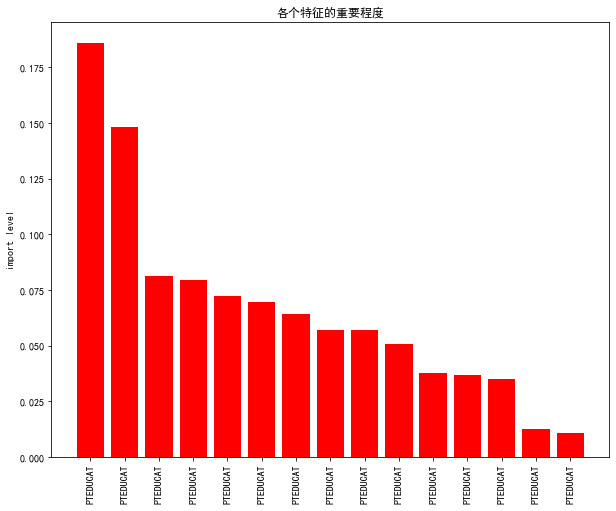

In [71]:
# 对训练好的随机森林，做出重要性评估并绘图展示

importances = rfc.feature_importances_   # feature_importances_  可以调取关于特征重要程度
print("重要性：", importances)
labels =data2.columns[1:]
indices = np.argsort(importances)[::-1]
labels_indices = []
for i in range(x_train.shape[1]):
    # 对于最后需要做的逆序排序，我认为是做了类似于决策树回溯的取值，从叶子收敛到根，
       #   根部重要程度是高于叶子的
    print("%2d) %-*s %f" % (i + 1, 30, labels[indices[i]], importances[indices[i]]))
    labels_indices.append(labels[indices[f]])
 
print(labels_indices,'\n')
print(labels.shape[0],'\n')
print(labels,'\n')
print(np.arange(labels.shape[0]))
 
# 选择变量（选择重要性比较高的变量）
threshold = 0.05
x_selected = x_train[:, importances > threshold]
 
# 可视化
# plt.rcParams['axes.unicode_minus'] = False
import matplotlib.pyplot as plt
 
plt.figure(figsize=(10, 8))
plt.title("各个特征的重要程度")
plt.ylabel("import level", rotation=90)
plt.rcParams['font.sans-serif'] = ["SimHei"]

for i in range(labels.shape[0]):
    plt.bar(i, importances[indices[i]], color='red', align='center')
    plt.xticks(np.arange(labels.shape[0]), labels_indices, rotation=90)
plt.show()

In [72]:
# xgboost 模型搭建

import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(x_train, y_train) # 训练模型


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [74]:
# 模型预测

y_pred = model.predict(x_test)
y_pred

array([0, 3, 1, 2, 4, 0, 1, 2, 2, 2, 1, 4, 0, 4, 0, 2, 2, 3, 2, 0, 0, 1,
       3, 4, 2, 1, 1, 2, 2, 1, 0, 0, 0, 3, 3, 4, 2, 3, 2, 3, 2, 2, 3, 1,
       1, 4, 1, 0, 3, 2, 4, 0, 2, 2, 0, 0, 2, 1, 3, 0, 1, 4, 1, 3, 0, 2,
       3, 1, 4, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 4, 2, 0, 3, 0, 0, 0, 1, 3,
       2, 4, 1, 4, 3, 0, 2, 3, 0, 4, 0, 1, 0, 2, 3, 0, 0, 0, 4, 0, 1, 3,
       0, 1, 1, 1, 3, 2, 1, 2, 2, 1, 0, 0, 4, 2, 3, 2, 1, 1, 3, 2, 4, 1,
       2, 1, 2, 4, 0, 0, 1, 0, 2, 0, 0, 2, 2, 2, 0, 0, 4, 2, 3, 2, 1, 0,
       0, 2, 0, 1, 1, 1, 2, 3, 2, 0, 3, 0, 1, 2, 3, 1, 4, 1, 2, 1, 2, 2,
       0, 0, 4, 2, 1, 0, 0, 3, 0, 0, 3, 2, 0, 0, 1, 2, 1, 0, 0, 4, 2, 3,
       0, 2, 2, 0, 2, 0, 1, 0, 2, 3, 2, 2, 0, 3, 2, 0, 2, 3, 0, 2, 2, 4,
       2, 2, 4, 4, 2, 0, 1, 0, 2, 2, 3, 1, 2, 3, 3, 0, 2, 3, 2, 3, 0, 1,
       2, 4, 3, 0, 2, 2, 2, 1, 2, 1, 2, 2, 0, 3, 2, 3, 2, 4, 1, 4, 1, 4,
       2, 4, 0, 2, 3, 1, 2, 2, 2, 1, 1, 1, 1, 3, 4, 1, 2, 2, 0, 2, 1, 4,
       2, 4, 3, 1, 0, 0, 2, 4, 1, 2, 3, 2, 4, 1, 1,

In [76]:
# 评价指标

report = classification_report(y_test, y_pred)
print("Classification Report:",)
print (report)
ac = accuracy_score(y_test,y_pred)
print("Accuracy:",ac)

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.71      0.62        94
           1       0.85      0.80      0.82        89
           2       0.87      0.90      0.88       144
           3       0.76      0.72      0.74        81
           4       0.42      0.29      0.34        77

    accuracy                           0.72       485
   macro avg       0.69      0.68      0.68       485
weighted avg       0.71      0.72      0.71       485

Accuracy: 0.7175257731958763


In [78]:
#      优化
# 随即参数搜索和K折交叉验证   加入 XGBoost 模型

from sklearn.model_selection import KFold # k折交叉

param_dist = {
        'n_estimators':range(80,200,4),
        'max_depth':range(2,15,1),
        'learning_rate':np.linspace(0.01,2,20),
        'subsample':np.linspace(0.7,0.9,20),
        'colsample_bytree':np.linspace(0.5,0.98,10),
        'min_child_weight':range(1,9,1)
        }
  

kf5 = KFold(5)

model_xg = RandomizedSearchCV(model,param_dist,cv = kf5,n_iter=100,refit="roc_auc",n_jobs = -1)
  
#训练模型（训练集上）
model_xg.fit(x_train,y_train)

#返回最优的训练器
best_estimator = model_xg.best_estimator_

print(best_estimator)
#输出最优训练器的精度
print(model_xg.best_score_)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.7666666666666666, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.01, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=10, max_leaves=0,
              min_child_weight=4, missing=nan, monotone_constraints='()',
              n_estimators=164, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0,
              reg_alpha=0, ...)
0.7309278350515465


In [79]:
# 模型搭建及训练

from sklearn.svm import SVC
model = SVC()  # 默认参数
model.fit(x_train, y_train) 


SVC()

In [83]:
# 评估指标

prediction = model.predict(x_test) 
print(classification_report(y_test, prediction)) 
accuracy_score(y_test,prediction)

              precision    recall  f1-score   support

           0       0.50      0.81      0.62        94
           1       0.92      0.79      0.85        89
           2       0.82      0.83      0.83       144
           3       0.57      0.68      0.62        81
           4       0.46      0.08      0.13        77

    accuracy                           0.67       485
   macro avg       0.65      0.64      0.61       485
weighted avg       0.68      0.67      0.65       485



0.6742268041237114

In [86]:
#      优化
#   对参数进行网格搜索 加入 SVM 模型

from sklearn.model_selection import GridSearchCV

# 把可能的参数放到字典中，这些参数都是svm算法的。不加，则默认。
param_grid = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'gamma':['scale', 'auto'],
              'kernel': ['linear']}  
# 网格搜索三个主要参数
#第一个参数为模型，第二个参数表示搜索参数结束后，用最佳参数结果再次fit一遍全部数据集
#    第三个参数表示跟CPU核数一致
SVM = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,n_jobs=-1) 
   
# 训练
SVM.fit(x_train, y_train) 
 
# 输出最佳参数

print(SVM.best_params_) 
# 预测

SVM_pred = SVM.predict(x_test) 
   
# 评估
print(classification_report(y_test, SVM_pred)) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'C': 100, 'gamma': 'scale', 'kernel': 'linear'}
              precision    recall  f1-score   support

           0       0.52      0.86      0.65        94
           1       0.91      0.79      0.84        89
           2       0.82      0.87      0.84       144
           3       0.64      0.65      0.65        81
           4       0.25      0.05      0.09        77

    accuracy                           0.69       485
   macro avg       0.63      0.64      0.61       485
weighted avg       0.66      0.69      0.65       485



In [87]:
accuracy_score(y_test,SVM_pred)

0.6865979381443299

In [123]:
# 将问题转换为 二分类问题，再搭建随机森林模型

#    label标签列值转换

data4 = data_bl[['AGE','PTGENDER','PTEDUCAT','PTRACCAT','MMSE','ADAS11','ADAS13','RAVLT_immediate','RAVLT_learning','RAVLT_forgetting',
                 'RAVLT_perc_forgetting','FAQ','mPACCdigit','ADASQ4_bl','LDELTOTAL_BL','DX_bl']]

mapping = {
           'CN': 0,
           'AD': 1,
           'LMCI': 1,
           'EMCI':1,
           'SMC':1
}




mapping2 = {
           'Male': 0,
           'Female': 1
}

mapping3 = {
            'White': 0,
            'Black': 1,
            'Asian':2,
            'More than one':3,
            'Unknown':4,
            'Am Indian/Alaskan':5,
            'Hawaiian/Other PI':6
}

data4['DX_bl'] =data4['DX_bl'].map(mapping)
data4['PTGENDER'] =data4['PTGENDER'].map(mapping2)
data4['PTRACCAT'] =data4['PTRACCAT'].map(mapping3)





#       模型搭建

# 特征构造

x = data4.drop(['DX_bl'],axis=1)
y = data4['DX_bl']

#  数据集划分

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

# 特征缩放，数据标准化，归一化

from sklearn.preprocessing import StandardScaler

sca = StandardScaler()
x_train = sca.fit_transform(x_train)
x_test = sca.transform(x_test)

In [124]:

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(x_train, y_train) # 训练模型
y_pred = rfc.predict(x_test)

In [125]:
# 评价指标 进行评估

from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print("Classification Report:",)
print (report)
ac = accuracy_score(y_test,y_pred)
print("Accuracy:",ac)

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.54      0.60        99
           1       0.89      0.93      0.91       386

    accuracy                           0.85       485
   macro avg       0.78      0.73      0.75       485
weighted avg       0.84      0.85      0.85       485

Accuracy: 0.8515463917525773


# 聚类，细分亚类

In [163]:
#     数据处理
data5 = data_bl.copy()

mapping = {
           'CN': 0,
           'AD': 1,
           'LMCI': 2,
           'EMCI':2,
           'SMC':2
}




mapping2 = {
           'Male': 0,
           'Female': 1
}

mapping3 = {
            'White': 0,
            'Black': 1,
            'Asian':2,
            'More than one':3,
            'Unknown':4,
            'Am Indian/Alaskan':5,
            'Hawaiian/Other PI':6
}

data5['DX_bl'] =data5['DX_bl'].map(mapping)
data5['PTGENDER'] =data5['PTGENDER'].map(mapping2)
data5['PTRACCAT'] =data5['PTRACCAT'].map(mapping3)

data_CN = data5.loc[data5['DX_bl']==0]
data_AD = data5.loc[data5['DX_bl']==1]
data_MCI = data5.loc[data5['DX_bl']==2]

In [164]:
data_CN.head()

,RID,COLPROT,ORIGPROT,PTID,SITE,VISCODE,EXAMDATE,DX_bl,AGE,PTGENDER,...,FLDSTRENG_bl,FSVERSION_bl,IMAGEUID_bl,ABETA_bl,TAU_bl,PTAU_bl,PIB_bl,FBB_bl,Month,update_stamp
0,2,ADNI1,ADNI1,011_S_0002,11,bl,2005-9-8,0,74.3,0,...,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,35475.0,>1700,211.8,18.85,1.582256,1.163628,0,58:48.0
10,5,ADNI1,ADNI1,011_S_0005,11,bl,2005-9-7,0,73.7,0,...,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,32246.0,547.3,337.0,33.43,1.582256,1.163628,0,58:48.0
26,14,ADNI1,ADNI1,022_S_0014,22,bl,2005-11-4,0,78.5,1,...,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,59375.0,1582.0,203.6,16.68,1.582256,1.163628,0,58:48.0
31,15,ADNI1,ADNI1,100_S_0015,100,bl,2005-10-18,0,80.8,0,...,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,33066.0,>1700,211.8,18.85,1.582256,1.163628,0,01:40.0
34,16,ADNI1,ADNI1,011_S_0016,11,bl,2005-10-13,0,65.4,0,...,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,32306.0,550.6,170.5,15.88,1.582256,1.163628,0,58:48.0


In [165]:
data_AD.head()

,RID,COLPROT,ORIGPROT,PTID,SITE,VISCODE,EXAMDATE,DX_bl,AGE,PTGENDER,...,FLDSTRENG_bl,FSVERSION_bl,IMAGEUID_bl,ABETA_bl,TAU_bl,PTAU_bl,PIB_bl,FBB_bl,Month,update_stamp
1,3,ADNI1,ADNI1,011_S_0003,11,bl,2005-9-12,1,81.3,0,...,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,32237.0,741.5,239.7,22.83,1.582256,1.163628,0,58:48.0
20,7,ADNI1,ADNI1,022_S_0007,22,bl,2005-10-6,1,75.4,0,...,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,59366.0,>1700,211.8,18.85,1.582256,1.163628,0,01:40.0
22,10,ADNI1,ADNI1,011_S_0010,11,bl,2005-11-10,1,73.9,1,...,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,32270.0,357.4,329.9,31.26,1.582256,1.163628,0,58:48.0
50,29,ADNI1,ADNI1,067_S_0029,67,bl,2005-10-31,1,64.1,0,...,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,119180.0,442.9,265.2,27.24,1.582256,1.163628,0,01:40.0
97,53,ADNI1,ADNI1,011_S_0053,11,bl,2005-11-29,1,80.1,0,...,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,35486.0,>1700,211.8,18.85,1.582256,1.163628,0,58:49.0


In [166]:
data_MCI.head()

,RID,COLPROT,ORIGPROT,PTID,SITE,VISCODE,EXAMDATE,DX_bl,AGE,PTGENDER,...,FLDSTRENG_bl,FSVERSION_bl,IMAGEUID_bl,ABETA_bl,TAU_bl,PTAU_bl,PIB_bl,FBB_bl,Month,update_stamp
5,4,ADNI1,ADNI1,022_S_0004,22,bl,2005-11-8,2,67.5,0,...,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,64631.0,1501.0,153.1,13.29,1.582256,1.163628,0,01:40.0
15,6,ADNI1,ADNI1,100_S_0006,100,bl,2005-11-29,2,80.4,1,...,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,33025.0,>1700,211.8,18.85,1.582256,1.163628,0,01:40.0
48,5282,ADNI2,ADNI2,082_S_5282,82,bl,2013-9-9,2,66.9,0,...,3 Tesla MRI,Cross-Sectional FreeSurfer (5.1),391070.0,558.9,170.7,15.63,1.582256,1.163628,0,59:02.0
61,38,ADNI1,ADNI1,067_S_0038,67,bl,2005-12-15,2,76.8,0,...,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,119182.0,874.1,153.2,13.45,1.582256,1.163628,0,01:40.0
69,42,ADNI1,ADNI1,023_S_0042,23,bl,2005-11-10,2,72.8,0,...,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,118850.0,1258.0,250.1,18.23,1.582256,1.163628,0,01:40.0


In [167]:
# 查看基本描述性统计信息

data_MCI.describe()

,RID,SITE,DX_bl,AGE,PTGENDER,PTEDUCAT,PTRACCAT,APOE4,FDG,PIB,...,ADASQ4_bl,LDELTOTAL_BL,DIGITSCOR_bl,TRABSCOR_bl,mPACCdigit_bl,mPACCtrailsB_bl,IMAGEUID_bl,PIB_bl,FBB_bl,Month
count,1473.000000,1473.000000,1473.0,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,...,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1473.000000,1.473000e+03,1473.000000,1473.000000,1473.0
mean,4012.757637,88.456891,2.0,72.243620,0.467074,16.151392,0.215886,0.552110,1.207112,1.781822,...,4.776752,7.555120,39.369422,106.864939,-4.747195,-4.361820,4.543251e+05,1.582963,1.160791,0.0
std,2364.953284,140.993056,0.0,7.460872,0.499084,2.676290,0.691244,0.617920,0.116602,0.037885,...,2.621783,4.522936,6.022417,61.879211,4.544745,4.330342,4.159904e+05,0.036186,0.088529,0.0
min,4.000000,2.000000,2.0,50.400000,0.000000,4.000000,0.000000,0.000000,0.735309,1.180000,...,0.000000,0.000000,5.000000,0.000000,-22.064200,-18.714100,3.202000e+04,1.180000,0.870200,0.0
25%,1338.000000,23.000000,2.0,67.000000,0.000000,14.000000,0.000000,0.000000,1.175624,1.783161,...,3.000000,4.000000,40.323842,66.000000,-8.132530,-7.654650,1.193790e+05,1.582256,1.163628,0.0
50%,4611.000000,53.000000,2.0,72.200000,0.000000,16.000000,0.000000,0.517131,1.175624,1.783161,...,5.000000,8.000000,40.323842,88.000000,-4.333280,-3.843170,2.770410e+05,1.582256,1.163628,0.0
75%,6279.000000,126.000000,2.0,77.500000,1.000000,18.000000,0.000000,1.000000,1.265220,1.783161,...,7.000000,10.000000,40.323842,123.000000,-1.422570,-1.072310,9.007960e+05,1.582256,1.163628,0.0
max,7105.000000,941.000000,2.0,91.400000,1.000000,20.000000,6.000000,2.000000,1.776170,2.282500,...,10.000000,23.000000,69.000000,300.000000,5.546410,5.357130,1.532649e+06,2.282500,1.816000,0.0


In [176]:
import datetime
str = '2022-08-28 00:00:00'
str = datetime.datetime.strptime(str, "%Y-%m-%d %H:%M:%S")
str

datetime.datetime(2022, 8, 28, 0, 0)

In [169]:
# 查看各个列属性的 数值类型

data_MCI.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1473 entries, 5 to 16203
Data columns (total 79 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RID                    1473 non-null   int64  
 1   COLPROT                1473 non-null   object 
 2   ORIGPROT               1473 non-null   object 
 3   PTID                   1473 non-null   object 
 4   SITE                   1473 non-null   int64  
 5   VISCODE                1473 non-null   object 
 6   EXAMDATE               1473 non-null   object 
 7   DX_bl                  1473 non-null   int64  
 8   AGE                    1473 non-null   float64
 9   PTGENDER               1473 non-null   int64  
 10  PTEDUCAT               1473 non-null   int64  
 11  PTETHCAT               1473 non-null   object 
 12  PTRACCAT               1473 non-null   int64  
 13  PTMARRY                1473 non-null   object 
 14  APOE4                  1473 non-null   float64
 15  FDG

In [236]:
#标准化 （对特征进行标准化，使得各特征的均值为0，方差为1）

# import sklearn
# ss = sklearn.preprocessing.StandardScaler(with_mean=True,with_std=True) #标准化
# data6 = ss.fit_transform(a)   #数据转换
# data6 = pd.DataFrame(a,columns=a.columns)


簇数是 2 时； SSE是 109944802693268.72
簇数是 3 时； SSE是 82207410398825.77
簇数是 4 时； SSE是 64029968712893.555
簇数是 5 时； SSE是 50095581419858.89
簇数是 6 时； SSE是 43361509689924.516
簇数是 7 时； SSE是 36650585266988.67
簇数是 8 时； SSE是 32436168585849.6
簇数是 9 时； SSE是 28666002748344.914


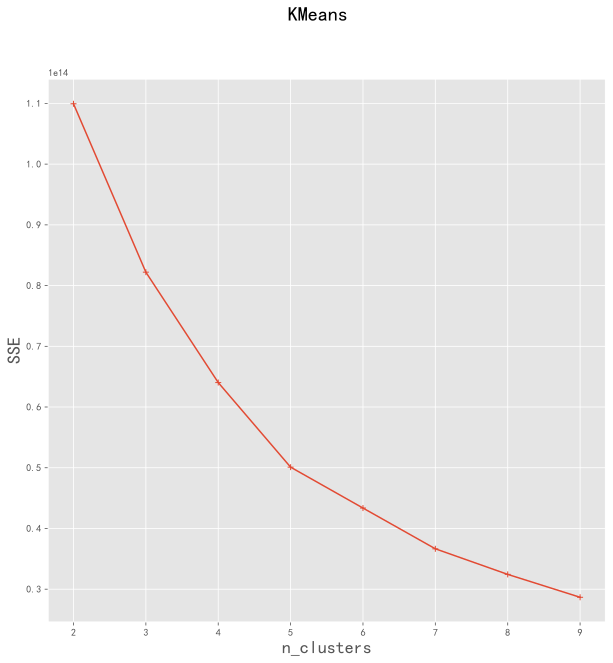

In [238]:
#  手肘法 + K均值

#通过观察SSE与K的关系图，来确定k的具体取值 

# from sklearn.cluster import KMeans
# def distEclud(vecA, vecB):
#     """
#     计算两个向量的欧式距离的平方，并返回
#     """
#     return np.sum(np.power(vecA - vecB, 2))
# def test_Kmeans_nclusters(data_train):
#     """
#     计算不同的k值时，SSE的大小变化
#     """
#     data_train = data_train.values
#     nums = range(2, 10)
#     SSE = []
#     for num in nums:
#         sse = 0
#         kmodel = KMeans(n_clusters=num)
#         kmodel.fit(data_train)
#         cluster_ceter_list = kmodel.cluster_centers_
#         cluster_list = kmodel.labels_.tolist()
#         for index in range(len(data_train)):  # 计算残差平方和
#             cluster_num = cluster_list[index]
#             sse += distEclud(data_train[index, :], cluster_ceter_list[cluster_num])
#         print("簇数是", num, "时； SSE是", sse)
#         SSE.append(sse)
#     return nums, SSE

# # 画图，通过观察SSE与k的取值尝试找出合适的k值
# nums, SSE = test_Kmeans_nclusters(a)
# plt.rcParams['font.size'] = 12.0
# plt.style.use('ggplot')
# fig = plt.figure(figsize=(10, 10))
# ax = fig.add_subplot(1, 1, 1)
# ax.plot(nums, SSE, marker="+")
# ax.set_xlabel("n_clusters", fontsize=18)
# ax.set_ylabel("SSE", fontsize=18)
# fig.suptitle("KMeans", fontsize=20)
# plt.show()

In [240]:
# num_clusters = 3   #设置类别为3
# km = sklearn.cluster.KMeans(n_clusters = num_clusters,random_state=0)  #模型加载
# km.fit(a)    #模型训练

KMeans(n_clusters=3, random_state=0)

In [241]:
# #查看 学习出来的三个群体的中心，以及三个群体所包含的样本个数

# r1 = pd.Series(km.labels_).value_counts()
# r2 = pd.DataFrame(km.cluster_centers_)
# r = pd.concat([r2,r1],axis=1)
# r.columns = list(a.columns) + ["counts"]
# r

,RID,COLPROT,ORIGPROT,PTID,SITE,VISCODE,EXAMDATE,DX_bl,AGE,PTGENDER,...,DIGITSCOR_bl,TRABSCOR_bl,mPACCdigit_bl,mPACCtrailsB_bl,IMAGEUID_bl,PIB_bl,FBB_bl,Month,update_stamp,counts
0,4468.137109,1.521610e+00,1.521610e+00,718.023845,82.518629,0.0,525.232489,2.0,71.488600,0.490313,...,40.315426,102.667884,-4.271744,-3.676470,2.945524e+05,1.582256,1.161239,0.0,34.149031,671
1,6487.594527,1.992537e+00,1.992537e+00,798.283582,115.783582,0.0,824.544776,2.0,71.018909,0.537313,...,40.323842,89.709565,-2.852160,-2.312052,1.096552e+06,1.582256,1.157220,0.0,27.873134,402
2,761.647500,3.552714e-15,3.552714e-15,703.560000,70.955000,0.0,125.562500,2.0,74.741000,0.357500,...,36.823310,131.146650,-7.449273,-7.571509,7.690539e+04,1.584859,1.163628,0.0,17.352500,400


In [267]:
data6 = data_bl[['AGE','PTGENDER','PTEDUCAT','PTRACCAT','MMSE','ADAS11','ADAS13','RAVLT_immediate','RAVLT_learning','RAVLT_forgetting',
                 'RAVLT_perc_forgetting','FAQ','mPACCdigit','ADASQ4_bl','LDELTOTAL_BL','DX_bl']]

mapping = {
           'CN': 0,
           'AD': 1,
           'LMCI': 2,
           'EMCI':2,
           'SMC':2
}




mapping2 = {
           'Male': 0,
           'Female': 1
}

mapping3 = {
            'White': 0,
            'Black': 1,
            'Asian':2,
            'More than one':3,
            'Unknown':4,
            'Am Indian/Alaskan':5,
            'Hawaiian/Other PI':6
}

data6['DX_bl'] =data6['DX_bl'].map(mapping)
data6['PTGENDER'] =data6['PTGENDER'].map(mapping2)
data6['PTRACCAT'] =data6['PTRACCAT'].map(mapping3)
data6.head()

,AGE,PTGENDER,PTEDUCAT,PTRACCAT,MMSE,ADAS11,ADAS13,RAVLT_immediate,RAVLT_learning,RAVLT_forgetting,RAVLT_perc_forgetting,FAQ,mPACCdigit,ADASQ4_bl,LDELTOTAL_BL,DX_bl
0,74.3,0,16,0,28.0,10.67,18.67,44.0,4.0,6.0,54.5455,0.0,-4.31670,5.0,10.0,0
1,81.3,0,18,0,20.0,22.00,31.00,22.0,1.0,4.0,100.0000,10.0,-16.29050,8.0,2.0,1
5,67.5,0,10,0,27.0,14.33,21.33,37.0,7.0,4.0,36.3636,0.0,-8.43305,6.0,4.0,2
10,73.7,0,16,0,29.0,8.67,14.67,37.0,4.0,4.0,44.4444,0.0,-1.89018,4.0,12.0,0
15,80.4,1,13,0,25.0,18.67,25.67,30.0,1.0,5.0,83.3333,0.0,-10.16300,7.0,3.0,2


In [261]:
data_bl.shape

(2425, 79)

In [268]:
data6 = data6[data6['DX_bl']==2].drop('DX_bl',axis=1).copy() # 这样就可以得到MCI的数据了。接着把标签去除。把它赋值给data4
data6

,AGE,PTGENDER,PTEDUCAT,PTRACCAT,MMSE,ADAS11,ADAS13,RAVLT_immediate,RAVLT_learning,RAVLT_forgetting,RAVLT_perc_forgetting,FAQ,mPACCdigit,ADASQ4_bl,LDELTOTAL_BL
5,67.5,0,10,0,27.0,14.33,21.33,37.0,7.0,4.0,36.3636,0.0,-8.43305,6.0,4.0
15,80.4,1,13,0,25.0,18.67,25.67,30.0,1.0,5.0,83.3333,0.0,-10.16300,7.0,3.0
48,66.9,0,17,0,29.0,10.00,15.00,42.0,5.0,2.0,20.0000,0.0,-1.85033,5.0,13.0
61,76.8,0,12,0,25.0,11.33,16.33,27.0,2.0,1.0,16.6667,1.0,-9.96276,4.0,3.0
69,72.8,0,18,0,30.0,7.00,12.00,29.0,6.0,8.0,88.8889,2.0,-3.98628,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16135,72.9,0,16,1,27.0,5.00,7.00,44.0,11.0,3.0,21.4286,0.0,-2.42053,1.0,10.0
16179,65.6,1,15,3,24.0,7.67,10.67,41.0,7.0,4.0,40.0000,2.0,-5.87400,2.0,12.0
16183,62.8,1,16,1,30.0,14.00,15.00,48.0,8.0,5.0,35.7143,0.0,1.89003,1.0,12.0
16193,65.7,1,16,1,30.0,3.00,7.00,35.0,6.0,4.0,40.0000,0.0,-0.33747,4.0,12.0


In [252]:
data6.columns

Index(['AGE', 'PTGENDER', 'PTEDUCAT', 'PTRACCAT', 'MMSE', 'ADAS11', 'ADAS13',
       'RAVLT_immediate', 'RAVLT_learning', 'RAVLT_forgetting',
       'RAVLT_perc_forgetting', 'FAQ', 'mPACCdigit', 'ADASQ4_bl',
       'LDELTOTAL_BL'],
      dtype='object')

In [253]:
# 标准化 （对特征进行标准化，使得各特征的均值为0，方差为1）,以便更好地进行聚类

import sklearn
ss = sklearn.preprocessing.StandardScaler(with_mean=True,with_std=True) #标准化
data6_ = ss.fit_transform(data6)   #数据转换

data6_nb = pd.DataFrame(data6,columns=data6.columns)

簇数是 2 时； SSE是 1132094.5256351293
簇数是 3 时； SSE是 833364.8041287558
簇数是 4 时； SSE是 563145.7844913243
簇数是 5 时； SSE是 474518.6974940149
簇数是 6 时； SSE是 435020.3814544833
簇数是 7 时； SSE是 401677.9606447675
簇数是 8 时； SSE是 372088.1539446233
簇数是 9 时； SSE是 348185.65035399416


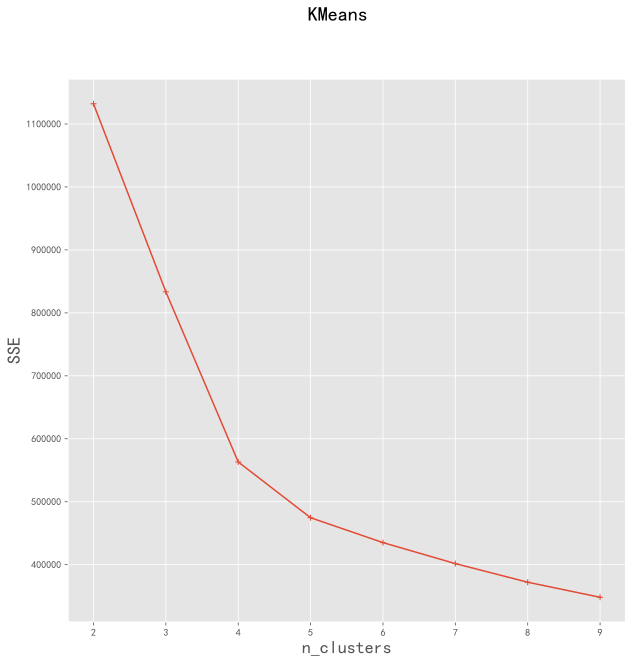

In [254]:
#     手肘法 + K均值

# 通过观察SSE与K的关系图，来确定k的具体取值 

from sklearn.cluster import KMeans
def distEclud(vecA, vecB):
    """
    计算两个向量的欧式距离的平方，并返回
    """
    return np.sum(np.power(vecA - vecB, 2))
def test_Kmeans_nclusters(data_train):
    """
    计算不同的k值时，SSE的大小变化
    """
    data_train = data_train.values
    nums = range(2, 10)
    SSE = []
    for num in nums:
        sse = 0
        kmodel = KMeans(n_clusters=num)
        kmodel.fit(data_train)
        cluster_ceter_list = kmodel.cluster_centers_
        cluster_list = kmodel.labels_.tolist()
        for index in range(len(data_train)):  # 计算残差平方和
            cluster_num = cluster_list[index]
            sse += distEclud(data_train[index, :], cluster_ceter_list[cluster_num])
        print("簇数是", num, "时； SSE是", sse)
        SSE.append(sse)
    return nums, SSE

# 画图，通过观察SSE与k的取值尝试找出合适的k值
nums, SSE = test_Kmeans_nclusters(data6_nb)
plt.rcParams['font.size'] = 12.0
plt.style.use('ggplot')
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.plot(nums, SSE, marker="+")
ax.set_xlabel("n_clusters", fontsize=18)
ax.set_ylabel("SSE", fontsize=18)
fig.suptitle("KMeans", fontsize=20)
plt.show()

In [289]:
# 按照题目要求，将 MCI 中的三个子类，继续 聚类完善成三个亚子类

num_clusters = 3   #设置类别为3
km = sklearn.cluster.KMeans(n_clusters = num_clusters,random_state=2)  #模型加载
km.fit(data6_nb)    #模型训练

KMeans(n_clusters=3, random_state=2)

In [285]:
#  散点图（未分类）
sns.set(style = 'white')
fig,ax = plt.subplots(figsize = (10,5))
sns.scatterplot(data = data6_nb,palette='Set1',s=100,color='red')
plt.savefig("path",transparent=True,dpi=1000)   #设置存储路径和格式
plt.show()

No handles with labels found to put in legend.


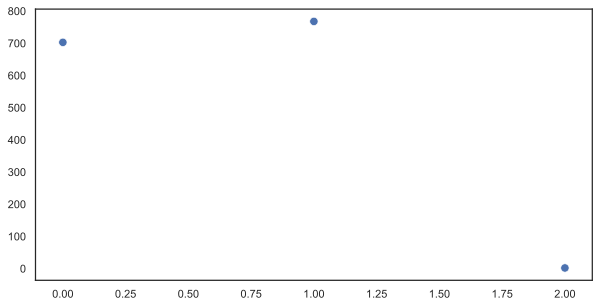

In [291]:
# 聚类结果散点图（分类） (查看中心点的位置)


#   绘制图形
sns.set(style='white')
fig,ax = plt.subplots(figsize = (10,5))
sns.scatterplot(data = r1,palette='Set1',s=70)
plt.legend(bbox_to_anchor=(1,1),frameon = False)
#plt.savefig("path",transparent=True,dpi=1000)
plt.show()

In [290]:
#查看 学习出来的三个群体的中心，以及三个群体所包含的样本个数

r1 = pd.Series(km.labels_).value_counts()
r2 = pd.DataFrame(km.cluster_centers_)
r = pd.concat([r2,r1],axis=1)
r.columns = list(data6_nb.columns) + ["counts"]
r

,AGE,PTGENDER,PTEDUCAT,PTRACCAT,MMSE,ADAS11,ADAS13,RAVLT_immediate,RAVLT_learning,RAVLT_forgetting,RAVLT_perc_forgetting,FAQ,mPACCdigit,ADASQ4_bl,LDELTOTAL_BL,counts
0,73.529093,0.408250,15.884780,0.183499,27.338549,11.232592,18.284138,30.602779,3.402385,6.224431,83.934438,3.676534,-7.155458,6.220157,5.456176,703
1,71.060937,0.520833,16.388021,0.244792,28.489314,6.988558,10.995525,43.365480,5.758098,2.862181,27.376657,1.440778,-2.532763,3.449720,9.481771,768
2,74.550000,0.500000,19.000000,0.500000,26.000000,12.500000,20.000000,28.500000,3.000000,-23.500000,-358.333500,6.500000,-9.845345,7.000000,5.500000,2


In [287]:
# 聚类成 9 类

num_clusters = 9   #设置类别为9
km = sklearn.cluster.KMeans(n_clusters = num_clusters,random_state=2)  #模型加载
km.fit(data6_nb)    #模型训练

KMeans(n_clusters=9, random_state=2)

No handles with labels found to put in legend.


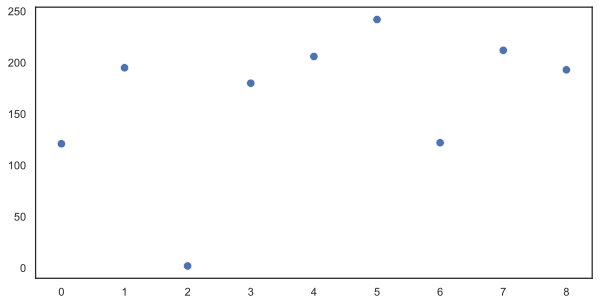

In [282]:
# 聚类结果散点图（分类） (查看中心点的位置)


#   绘制图形
sns.set(style='white')
fig,ax = plt.subplots(figsize = (10,5))
sns.scatterplot(data = r1,palette='Set1',s=70)
plt.legend(bbox_to_anchor=(1,1),frameon = False)
#plt.savefig("path",transparent=True,dpi=1000)
plt.show()

In [281]:
#查看 学习出来的9个群体的中心，以及9个群体所包含的样本个数

r1 = pd.Series(km.labels_).value_counts()
r2 = pd.DataFrame(km.cluster_centers_)
r = pd.concat([r2,r1],axis=1)
r.columns = list(data6_nb.columns) + ["counts"]
r

,AGE,PTGENDER,PTEDUCAT,PTRACCAT,MMSE,ADAS11,ADAS13,RAVLT_immediate,RAVLT_learning,RAVLT_forgetting,RAVLT_perc_forgetting,FAQ,mPACCdigit,ADASQ4_bl,LDELTOTAL_BL,counts
0,74.780165,0.363636,16.008264,0.165289,27.983471,8.760165,14.297355,35.148760,4.677686,1.537190,17.236092,2.107438,-4.464587,4.595041,7.826446,121
1,74.537184,0.364103,15.415385,0.153846,27.200000,12.082000,19.733282,29.517949,3.164103,5.651282,78.179070,3.094253,-7.789532,6.666667,4.897436,195
2,74.550000,0.500000,19.000000,0.500000,26.000000,12.500000,20.000000,28.500000,3.000000,-23.500000,-358.333500,6.500000,-9.845345,7.000000,5.500000,2
3,75.105556,0.311111,15.538889,0.133333,27.344444,11.263561,17.801607,29.292714,3.767884,3.445305,46.300016,3.167720,-6.831710,5.692737,5.906836,180
4,74.897819,0.378641,15.888350,0.150485,26.349515,14.498447,23.503616,24.320388,2.053398,5.660194,99.930652,5.955139,-10.277839,7.961165,2.805825,206
5,69.247934,0.578512,16.652893,0.342975,28.800798,5.959388,9.407744,46.508264,6.537190,3.933884,33.017238,0.945283,-1.518382,2.986333,10.384298,242
6,70.456974,0.549180,16.303279,0.286885,28.245902,7.910082,13.121023,36.065574,4.426230,8.795082,97.322002,2.468343,-4.587415,4.696721,7.163934,122
7,71.276887,0.443396,16.344340,0.216981,28.452830,7.153663,11.529030,39.645066,5.268287,6.187618,60.523025,1.672251,-3.037843,3.891877,9.096515,212
8,68.757513,0.709845,16.870466,0.248705,29.072539,4.714277,7.008885,54.233161,6.689119,0.844560,5.630270,0.784349,0.009347,1.972501,11.704663,193


# 时序分析

In [300]:
data7 = data.copy()
data7.shape

(16222, 116)

In [ ]:
# 可知 EXAMDATE_b 是未开始前的时间。EXAMDATE 是结束的时间

In [304]:
# 若该属性列有缺失值 则删除
data7['EXAMDATE'].dropna(inplace=True)

In [314]:
# 查看缺失情况
data7['EXAMDATE'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
16217    False
16218    False
16219    False
16220    False
16221    False
Name: EXAMDATE, Length: 16222, dtype: bool

In [306]:
data7.drop('M',axis=1,inplace=True)

In [308]:
data7['WholeBrain_bl'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
16217    False
16218    False
16219    False
16220    False
16221    False
Name: WholeBrain_bl, Length: 16222, dtype: bool

In [318]:
# 删除记录时间为0的数据（Month = 0）

for i in range(16222):
    if data7['Month'][i] == 0:
        data7.drop(i,axis=0,inplace=True)
        

In [357]:
data7.head()

,RID,COLPROT,ORIGPROT,PTID,SITE,VISCODE,EXAMDATE,DX_bl,AGE,PTGENDER,...,TAU_bl,PTAU_bl,FDG_bl,PIB_bl,AV45_bl,FBB_bl,Years_bl,Month_bl,Month,update_stamp
0,3,ADNI1,ADNI1,011_S_0003,11,m06,2006-3-13,AD,81.3,Male,...,239.7,22.83,1.108600,1.582256,1.187312,1.163628,0.498289,5.96721,6,58:48.0
1,3,ADNI1,ADNI1,011_S_0003,11,m12,2006-9-12,AD,81.3,Male,...,239.7,22.83,1.108600,1.582256,1.187312,1.163628,0.999316,11.96720,12,58:48.0
2,3,ADNI1,ADNI1,011_S_0003,11,m24,2007-9-12,AD,81.3,Male,...,239.7,22.83,1.108600,1.582256,1.187312,1.163628,1.998630,23.93440,24,58:48.0
3,4,ADNI1,ADNI1,022_S_0004,22,m06,2006-5-2,LMCI,67.5,Male,...,153.1,13.29,1.226403,1.582256,1.187312,1.163628,0.479124,5.73770,6,01:40.0
4,4,ADNI1,ADNI1,022_S_0004,22,m12,2006-11-14,LMCI,67.5,Male,...,153.1,13.29,1.226403,1.582256,1.187312,1.163628,1.015740,12.16390,12,01:40.0


In [351]:
data7.shape

(13797, 115)

In [322]:
data7.index = np.arange(13797)

In [358]:
data7['EcogPtMem'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
13792    False
13793    False
13794    False
13795    False
13796    False
Name: EcogPtMem, Length: 13797, dtype: bool

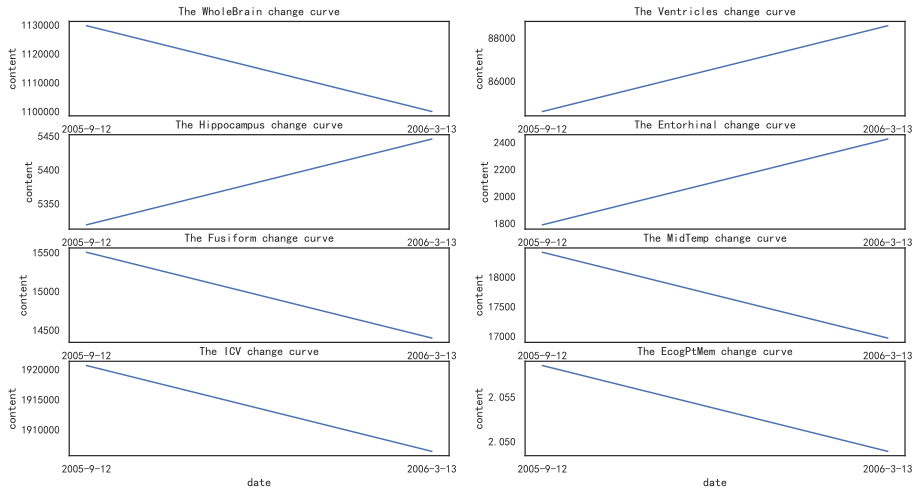

In [388]:
#  对样本中 AD 病患的一些生物成分的变化进行分析

#     以 RID=3 的样本 为例
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))


ax1 = plt.subplot(421)
x = [data7['EXAMDATE_bl'][0],data7['WholeBrain_bl'][0]]
y = [data7['EXAMDATE'][0],data7['WholeBrain'][0]]
# sns.regplot(x,y,line_kws={"color":"blue"},scatter_kws={"color":"grey"})

b = [x,y]
a = pd.DataFrame(b)
plt.xlabel('date')
plt.ylabel('content')
plt.title('The WholeBrain change curve')
sns.lineplot(x=a[0],y = a[1])


ax2 = plt.subplot(422)
x = [data7['EXAMDATE_bl'][0],data7['Ventricles_bl'][0]]
y = [data7['EXAMDATE'][0],data7['Ventricles'][0]]
# sns.regplot(x,y,line_kws={"color":"blue"},scatter_kws={"color":"grey"})

b = [x,y]
a = pd.DataFrame(b)
plt.xlabel('date')
plt.ylabel('content')
plt.title('The Ventricles change curve')
sns.lineplot(x=a[0],y = a[1])

ax3 = plt.subplot(423)
x = [data7['EXAMDATE_bl'][0],data7['Hippocampus_bl'][0]]
y = [data7['EXAMDATE'][0],data7['Hippocampus'][0]]
# sns.regplot(x,y,line_kws={"color":"blue"},scatter_kws={"color":"grey"})

b = [x,y]
a = pd.DataFrame(b)
plt.xlabel('date')
plt.ylabel('content')
plt.title('The Hippocampus change curve')
sns.lineplot(x=a[0],y = a[1])

ax4 = plt.subplot(424)
x = [data7['EXAMDATE_bl'][0],data7['Entorhinal_bl'][0]]
y = [data7['EXAMDATE'][0],data7['Entorhinal'][0]]
# sns.regplot(x,y,line_kws={"color":"blue"},scatter_kws={"color":"grey"})

b = [x,y]
a = pd.DataFrame(b)
plt.xlabel('date')
plt.ylabel('content')
plt.title('The Entorhinal change curve')
sns.lineplot(x=a[0],y = a[1])


ax5 = plt.subplot(425)
x = [data7['EXAMDATE_bl'][0],data7['Fusiform_bl'][0]]
y = [data7['EXAMDATE'][0],data7['Fusiform'][0]]
# sns.regplot(x,y,line_kws={"color":"blue"},scatter_kws={"color":"grey"})

b = [x,y]
a = pd.DataFrame(b)
plt.xlabel('date')
plt.ylabel('content')
plt.title('The Fusiform change curve')
sns.lineplot(x=a[0],y = a[1])

ax6 = plt.subplot(426)
x = [data7['EXAMDATE_bl'][0],data7['MidTemp_bl'][0]]
y = [data7['EXAMDATE'][0],data7['MidTemp'][0]]
# sns.regplot(x,y,line_kws={"color":"blue"},scatter_kws={"color":"grey"})

b = [x,y]
a = pd.DataFrame(b)
plt.xlabel('date')
plt.ylabel('content')
plt.title('The MidTemp change curve')
sns.lineplot(x=a[0],y = a[1])

ax7 = plt.subplot(427)
x = [data7['EXAMDATE_bl'][0],data7['ICV_bl'][0]]
y = [data7['EXAMDATE'][0],data7['ICV'][0]]
# sns.regplot(x,y,line_kws={"color":"blue"},scatter_kws={"color":"grey"})

b = [x,y]
a = pd.DataFrame(b)
plt.xlabel('date')
plt.ylabel('content')
plt.title('The ICV change curve')
sns.lineplot(x=a[0],y = a[1])

ax8 = plt.subplot(428)
x = [data7['EXAMDATE_bl'][0],data7['EcogPtMem_bl'][0]]
y = [data7['EXAMDATE'][0],data7['EcogPtMem'][0]]
# sns.regplot(x,y,line_kws={"color":"blue"},scatter_kws={"color":"grey"})

b = [x,y]
a = pd.DataFrame(b)
plt.xlabel('date')
plt.ylabel('content')
plt.title('The EcogPtMem change curve')
sns.lineplot(x=a[0],y = a[1])

plt.savefig('D:/学习专区/比赛专题/数维杯/2022“ShuWei Cup”_Problem/论文/图表/4.png',transparent=True,dpi=1000)
plt.show()

In [462]:
#  对 ABETA中的数据进行处理
def mc(str): 
    global x
    x = str
    if x == '>1700':
        regex = re.compile(r">")
        name = regex.sub('', x)
        x = int(name)
    return x


# data8['ABETA'] = data8['ABETA'].apply(mc(x))
a = []
for i in data7['ABETA']:
    if i == '>1700':
        i = mc(i)
        a.append(i)
    else:
        a.append(i)

data7['ABETA'] = a

b = []
for i in data7['ABETA_bl']:
    if i == '>1700':
        i = mc(i)
        b.append(i)
    else:
        b.append(i)

data7['ABETA_bl'] = b

data7['ABETA_bl']

0         741.5
1         741.5
2         741.5
3        1501.0
4        1501.0
          ...  
13792      1700
13793      1700
13794      1700
13795      1700
13796      1700
Name: ABETA_bl, Length: 13797, dtype: object

In [471]:
#  对 TAU 中的数据进行处理
def mc(str): 
    global x
    x = str
    if x == '<20':
        regex = re.compile(r"<")
        name = regex.sub('', x)
        x = int(name)
    return x


# data8['ABETA'] = data8['ABETA'].apply(mc(x))
a = []
for i in data7['TAU']:
    if i == '<20':
        i = mc(i)
        a.append(i)
    else:
        a.append(i)

data7['TAU'] = a

b = []
for i in data7['TAU']:
    if i == '<20':
        i = mc(i)
        b.append(i)
    else:
        b.append(i)

data7['TAU'] = b

data7['TAU']


0          <80
1        251.7
2          <80
3          <80
4        159.7
         ...  
13792      <80
13793      <80
13794      <80
13795      <80
13796      <80
Name: TAU, Length: 13797, dtype: object

In [472]:
def mc(str): 
    global x
    x = str
    if x == '<80':
        regex = re.compile(r"<")
        name = regex.sub('', x)
        x = int(name)
    return x


# data8['ABETA'] = data8['ABETA'].apply(mc(x))
a = []
for i in data7['TAU']:
    if i == '<80':
        i = mc(i)
        a.append(i)
    else:
        a.append(i)

data7['TAU'] = a

b = []
for i in data7['TAU']:
    if i == '<80':
        i = mc(i)
        b.append(i)
    else:
        b.append(i)

data7['TAU'] = b

data7['TAU']


0           80
1        251.7
2           80
3           80
4        159.7
         ...  
13792       80
13793       80
13794       80
13795       80
13796       80
Name: TAU, Length: 13797, dtype: object

In [474]:
#  对 PTAU 中的数据进行处理
def mc(str): 
    global x
    x = str
    if x == '<8':
        regex = re.compile(r"<")
        name = regex.sub('', x)
        x = int(name)
    return x


# data8['ABETA'] = data8['ABETA'].apply(mc(x))
a = []
for i in data7['PTAU']:
    if i == '<8':
        i = mc(i)
        a.append(i)
    else:
        a.append(i)

data7['PTAU'] = a

b = []
for i in data7['PTAU']:
    if i == '<8':
        i = mc(i)
        b.append(i)
    else:
        b.append(i)

data7['PTAU'] = b

data7['PTAU']

0            8
1        24.18
2            8
3            8
4         13.3
         ...  
13792        8
13793        8
13794        8
13795        8
13796        8
Name: PTAU, Length: 13797, dtype: object

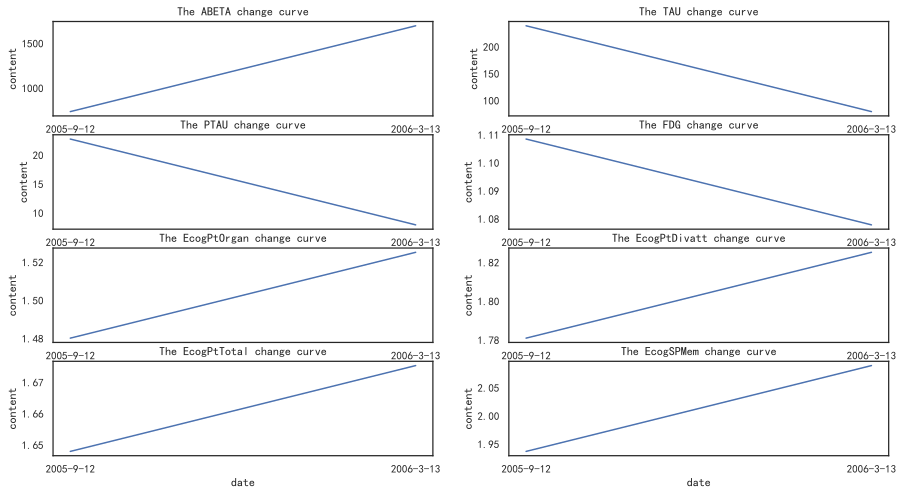

In [475]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))


ax1 = plt.subplot(421)
x = [data7['EXAMDATE_bl'][0],data7['ABETA_bl'][0]]
y = [data7['EXAMDATE'][0],data7['ABETA'][0]]
# sns.regplot(x,y,line_kws={"color":"blue"},scatter_kws={"color":"grey"})

b = [x,y]
a = pd.DataFrame(b)
plt.xlabel('date')
plt.ylabel('content')
plt.title('The ABETA change curve')
sns.lineplot(x=a[0],y = a[1])


ax2 = plt.subplot(422)
x = [data7['EXAMDATE_bl'][0],data7['TAU_bl'][0]]
y = [data7['EXAMDATE'][0],data7['TAU'][0]]
# sns.regplot(x,y,line_kws={"color":"blue"},scatter_kws={"color":"grey"})

b = [x,y]
a = pd.DataFrame(b)
plt.xlabel('date')
plt.ylabel('content')
plt.title('The TAU change curve')
sns.lineplot(x=a[0],y = a[1])

ax3 = plt.subplot(423)
x = [data7['EXAMDATE_bl'][0],data7['PTAU_bl'][0]]
y = [data7['EXAMDATE'][0],data7['PTAU'][0]]
# sns.regplot(x,y,line_kws={"color":"blue"},scatter_kws={"color":"grey"})

b = [x,y]
a = pd.DataFrame(b)
plt.xlabel('date')
plt.ylabel('content')
plt.title('The PTAU change curve')
sns.lineplot(x=a[0],y = a[1])

ax4 = plt.subplot(424)
x = [data7['EXAMDATE_bl'][0],data7['FDG_bl'][0]]
y = [data7['EXAMDATE'][0],data7['FDG'][0]]
# sns.regplot(x,y,line_kws={"color":"blue"},scatter_kws={"color":"grey"})

b = [x,y]
a = pd.DataFrame(b)
plt.xlabel('date')
plt.ylabel('content')
plt.title('The FDG change curve')
sns.lineplot(x=a[0],y = a[1])


ax5 = plt.subplot(425)
x = [data7['EXAMDATE_bl'][0],data7['EcogPtOrgan_bl'][0]]
y = [data7['EXAMDATE'][0],data7['EcogPtOrgan'][0]]
# sns.regplot(x,y,line_kws={"color":"blue"},scatter_kws={"color":"grey"})

b = [x,y]
a = pd.DataFrame(b)
plt.xlabel('date')
plt.ylabel('content')
plt.title('The EcogPtOrgan change curve')
sns.lineplot(x=a[0],y = a[1])

ax6 = plt.subplot(426)
x = [data7['EXAMDATE_bl'][0],data7['EcogPtDivatt_bl'][0]]
y = [data7['EXAMDATE'][0],data7['EcogPtDivatt'][0]]
# sns.regplot(x,y,line_kws={"color":"blue"},scatter_kws={"color":"grey"})

b = [x,y]
a = pd.DataFrame(b)
plt.xlabel('date')
plt.ylabel('content')
plt.title('The EcogPtDivatt change curve')
sns.lineplot(x=a[0],y = a[1])

ax7 = plt.subplot(427)
x = [data7['EXAMDATE_bl'][0],data7['EcogPtTotal_bl'][0]]
y = [data7['EXAMDATE'][0],data7['EcogPtTotal'][0]]
# sns.regplot(x,y,line_kws={"color":"blue"},scatter_kws={"color":"grey"})

b = [x,y]
a = pd.DataFrame(b)
plt.xlabel('date')
plt.ylabel('content')
plt.title('The EcogPtTotal change curve')
sns.lineplot(x=a[0],y = a[1])

ax8 = plt.subplot(428)
x = [data7['EXAMDATE_bl'][0],data7['EcogSPMem_bl'][0]]
y = [data7['EXAMDATE'][0],data7['EcogSPMem'][0]]
# sns.regplot(x,y,line_kws={"color":"blue"},scatter_kws={"color":"grey"})

b = [x,y]
a = pd.DataFrame(b)
plt.xlabel('date')
plt.ylabel('content')
plt.title('The EcogSPMem change curve')
sns.lineplot(x=a[0],y = a[1])

plt.savefig('D:/学习专区/比赛专题/数维杯/2022“ShuWei Cup”_Problem/论文/图表/5.png',transparent=True,dpi=1000)
plt.show()

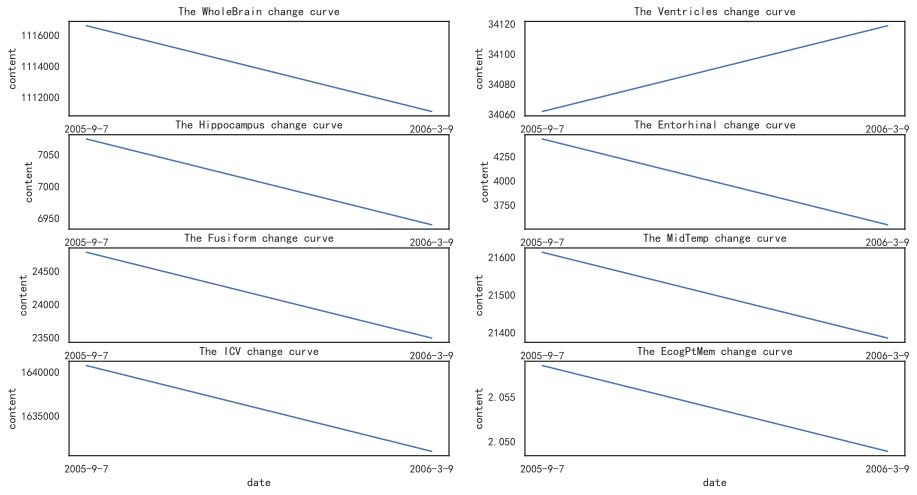

In [480]:
#  对样本中 CN 病患的一些生物成分的变化进行分析

#     以 RID=5 的样本 为例

plt.figure(figsize=(15,8))


ax1 = plt.subplot(421)
x = [data7['EXAMDATE_bl'][7],data7['WholeBrain_bl'][7]]
y = [data7['EXAMDATE'][7],data7['WholeBrain'][7]]
# sns.regplot(x,y,line_kws={"color":"blue"},scatter_kws={"color":"grey"})

b = [x,y]
a = pd.DataFrame(b)
plt.xlabel('date')
plt.ylabel('content')
plt.title('The WholeBrain change curve')
sns.lineplot(x=a[0],y = a[1])


ax2 = plt.subplot(422)
x = [data7['EXAMDATE_bl'][7],data7['Ventricles_bl'][7]]
y = [data7['EXAMDATE'][7],data7['Ventricles'][7]]
# sns.regplot(x,y,line_kws={"color":"blue"},scatter_kws={"color":"grey"})

b = [x,y]
a = pd.DataFrame(b)
plt.xlabel('date')
plt.ylabel('content')
plt.title('The Ventricles change curve')
sns.lineplot(x=a[0],y = a[1])

ax3 = plt.subplot(423)
x = [data7['EXAMDATE_bl'][7],data7['Hippocampus_bl'][7]]
y = [data7['EXAMDATE'][7],data7['Hippocampus'][7]]
# sns.regplot(x,y,line_kws={"color":"blue"},scatter_kws={"color":"grey"})

b = [x,y]
a = pd.DataFrame(b)
plt.xlabel('date')
plt.ylabel('content')
plt.title('The Hippocampus change curve')
sns.lineplot(x=a[0],y = a[1])

ax4 = plt.subplot(424)
x = [data7['EXAMDATE_bl'][7],data7['Entorhinal_bl'][7]]
y = [data7['EXAMDATE'][7],data7['Entorhinal'][7]]
# sns.regplot(x,y,line_kws={"color":"blue"},scatter_kws={"color":"grey"})

b = [x,y]
a = pd.DataFrame(b)
plt.xlabel('date')
plt.ylabel('content')
plt.title('The Entorhinal change curve')
sns.lineplot(x=a[0],y = a[1])


ax5 = plt.subplot(425)
x = [data7['EXAMDATE_bl'][7],data7['Fusiform_bl'][7]]
y = [data7['EXAMDATE'][7],data7['Fusiform'][7]]
# sns.regplot(x,y,line_kws={"color":"blue"},scatter_kws={"color":"grey"})

b = [x,y]
a = pd.DataFrame(b)
plt.xlabel('date')
plt.ylabel('content')
plt.title('The Fusiform change curve')
sns.lineplot(x=a[0],y = a[1])

ax6 = plt.subplot(426)
x = [data7['EXAMDATE_bl'][7],data7['MidTemp_bl'][7]]
y = [data7['EXAMDATE'][7],data7['MidTemp'][7]]
# sns.regplot(x,y,line_kws={"color":"blue"},scatter_kws={"color":"grey"})

b = [x,y]
a = pd.DataFrame(b)
plt.xlabel('date')
plt.ylabel('content')
plt.title('The MidTemp change curve')
sns.lineplot(x=a[0],y = a[1])

ax7 = plt.subplot(427)
x = [data7['EXAMDATE_bl'][7],data7['ICV_bl'][7]]
y = [data7['EXAMDATE'][7],data7['ICV'][7]]
# sns.regplot(x,y,line_kws={"color":"blue"},scatter_kws={"color":"grey"})

b = [x,y]
a = pd.DataFrame(b)
plt.xlabel('date')
plt.ylabel('content')
plt.title('The ICV change curve')
sns.lineplot(x=a[0],y = a[1])

ax8 = plt.subplot(428)
x = [data7['EXAMDATE_bl'][7],data7['EcogPtMem_bl'][7]]
y = [data7['EXAMDATE'][7],data7['EcogPtMem'][7]]
# sns.regplot(x,y,line_kws={"color":"blue"},scatter_kws={"color":"grey"})

b = [x,y]
a = pd.DataFrame(b)
plt.xlabel('date')
plt.ylabel('content')
plt.title('The EcogPtMem change curve')
sns.lineplot(x=a[0],y = a[1])

plt.savefig('D:/学习专区/比赛专题/数维杯/2022“ShuWei Cup”_Problem/论文/图表/CN1.png',transparent=True,dpi=1000)
plt.show()

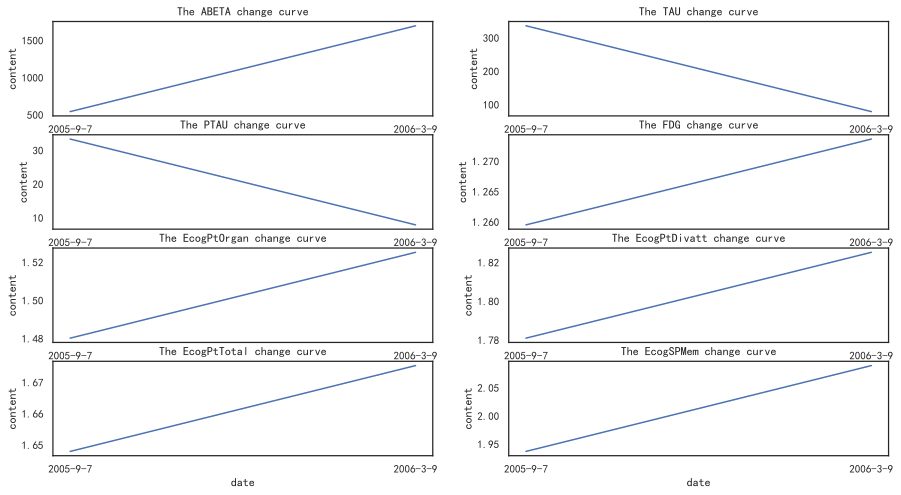

In [481]:
plt.figure(figsize=(15,8))


ax1 = plt.subplot(421)
x = [data7['EXAMDATE_bl'][7],data7['ABETA_bl'][7]]
y = [data7['EXAMDATE'][7],data7['ABETA'][7]]
# sns.regplot(x,y,line_kws={"color":"blue"},scatter_kws={"color":"grey"})

b = [x,y]
a = pd.DataFrame(b)
plt.xlabel('date')
plt.ylabel('content')
plt.title('The ABETA change curve')
sns.lineplot(x=a[0],y = a[1])


ax2 = plt.subplot(422)
x = [data7['EXAMDATE_bl'][7],data7['TAU_bl'][7]]
y = [data7['EXAMDATE'][7],data7['TAU'][7]]
# sns.regplot(x,y,line_kws={"color":"blue"},scatter_kws={"color":"grey"})

b = [x,y]
a = pd.DataFrame(b)
plt.xlabel('date')
plt.ylabel('content')
plt.title('The TAU change curve')
sns.lineplot(x=a[0],y = a[1])

ax3 = plt.subplot(423)
x = [data7['EXAMDATE_bl'][7],data7['PTAU_bl'][7]]
y = [data7['EXAMDATE'][7],data7['PTAU'][7]]
# sns.regplot(x,y,line_kws={"color":"blue"},scatter_kws={"color":"grey"})

b = [x,y]
a = pd.DataFrame(b)
plt.xlabel('date')
plt.ylabel('content')
plt.title('The PTAU change curve')
sns.lineplot(x=a[0],y = a[1])

ax4 = plt.subplot(424)
x = [data7['EXAMDATE_bl'][7],data7['FDG_bl'][7]]
y = [data7['EXAMDATE'][7],data7['FDG'][7]]
# sns.regplot(x,y,line_kws={"color":"blue"},scatter_kws={"color":"grey"})

b = [x,y]
a = pd.DataFrame(b)
plt.xlabel('date')
plt.ylabel('content')
plt.title('The FDG change curve')
sns.lineplot(x=a[0],y = a[1])


ax5 = plt.subplot(425)
x = [data7['EXAMDATE_bl'][7],data7['EcogPtOrgan_bl'][7]]
y = [data7['EXAMDATE'][7],data7['EcogPtOrgan'][7]]
# sns.regplot(x,y,line_kws={"color":"blue"},scatter_kws={"color":"grey"})

b = [x,y]
a = pd.DataFrame(b)
plt.xlabel('date')
plt.ylabel('content')
plt.title('The EcogPtOrgan change curve')
sns.lineplot(x=a[0],y = a[1])

ax6 = plt.subplot(426)
x = [data7['EXAMDATE_bl'][7],data7['EcogPtDivatt_bl'][7]]
y = [data7['EXAMDATE'][7],data7['EcogPtDivatt'][7]]
# sns.regplot(x,y,line_kws={"color":"blue"},scatter_kws={"color":"grey"})

b = [x,y]
a = pd.DataFrame(b)
plt.xlabel('date')
plt.ylabel('content')
plt.title('The EcogPtDivatt change curve')
sns.lineplot(x=a[0],y = a[1])

ax7 = plt.subplot(427)
x = [data7['EXAMDATE_bl'][7],data7['EcogPtTotal_bl'][7]]
y = [data7['EXAMDATE'][7],data7['EcogPtTotal'][7]]
# sns.regplot(x,y,line_kws={"color":"blue"},scatter_kws={"color":"grey"})

b = [x,y]
a = pd.DataFrame(b)
plt.xlabel('date')
plt.ylabel('content')
plt.title('The EcogPtTotal change curve')
sns.lineplot(x=a[0],y = a[1])

ax8 = plt.subplot(428)
x = [data7['EXAMDATE_bl'][7],data7['EcogSPMem_bl'][7]]
y = [data7['EXAMDATE'][7],data7['EcogSPMem'][7]]
# sns.regplot(x,y,line_kws={"color":"blue"},scatter_kws={"color":"grey"})

b = [x,y]
a = pd.DataFrame(b)
plt.xlabel('date')
plt.ylabel('content')
plt.title('The EcogSPMem change curve')
sns.lineplot(x=a[0],y = a[1])

plt.savefig('D:/学习专区/比赛专题/数维杯/2022“ShuWei Cup”_Problem/论文/图表/CN2.png',transparent=True,dpi=1000)
plt.show()

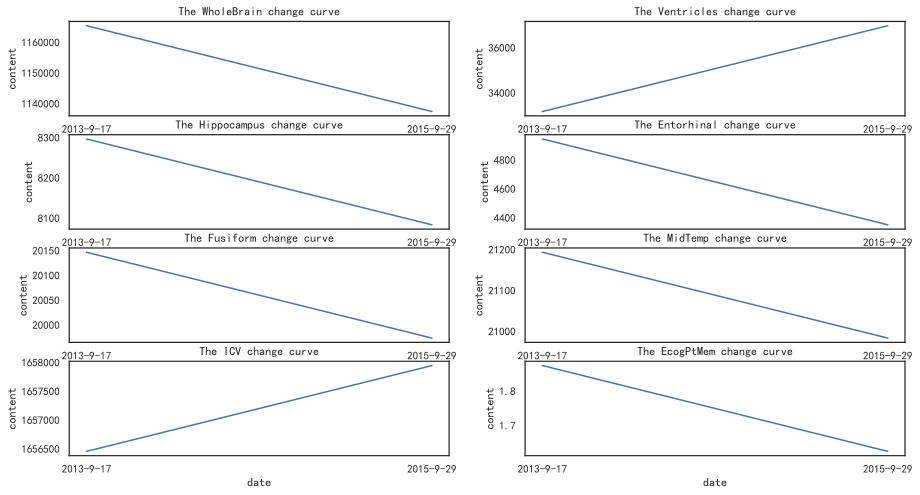

In [483]:
#  对样本中 SMC 病患的一些生物成分的变化进行分析

#     以 RID=5280 的样本 为例 (这个病患 由 SMC 变成了 AD)

plt.figure(figsize=(15,8))


ax1 = plt.subplot(421)
x = [data7['EXAMDATE_bl'][36],data7['WholeBrain_bl'][36]]
y = [data7['EXAMDATE'][36],data7['WholeBrain'][36]]
# sns.regplot(x,y,line_kws={"color":"blue"},scatter_kws={"color":"grey"})

b = [x,y]
a = pd.DataFrame(b)
plt.xlabel('date')
plt.ylabel('content')
plt.title('The WholeBrain change curve')
sns.lineplot(x=a[0],y = a[1])


ax2 = plt.subplot(422)
x = [data7['EXAMDATE_bl'][36],data7['Ventricles_bl'][36]]
y = [data7['EXAMDATE'][36],data7['Ventricles'][36]]
# sns.regplot(x,y,line_kws={"color":"blue"},scatter_kws={"color":"grey"})

b = [x,y]
a = pd.DataFrame(b)
plt.xlabel('date')
plt.ylabel('content')
plt.title('The Ventricles change curve')
sns.lineplot(x=a[0],y = a[1])

ax3 = plt.subplot(423)
x = [data7['EXAMDATE_bl'][36],data7['Hippocampus_bl'][36]]
y = [data7['EXAMDATE'][36],data7['Hippocampus'][36]]
# sns.regplot(x,y,line_kws={"color":"blue"},scatter_kws={"color":"grey"})

b = [x,y]
a = pd.DataFrame(b)
plt.xlabel('date')
plt.ylabel('content')
plt.title('The Hippocampus change curve')
sns.lineplot(x=a[0],y = a[1])

ax4 = plt.subplot(424)
x = [data7['EXAMDATE_bl'][36],data7['Entorhinal_bl'][36]]
y = [data7['EXAMDATE'][36],data7['Entorhinal'][36]]
# sns.regplot(x,y,line_kws={"color":"blue"},scatter_kws={"color":"grey"})

b = [x,y]
a = pd.DataFrame(b)
plt.xlabel('date')
plt.ylabel('content')
plt.title('The Entorhinal change curve')
sns.lineplot(x=a[0],y = a[1])


ax5 = plt.subplot(425)
x = [data7['EXAMDATE_bl'][36],data7['Fusiform_bl'][36]]
y = [data7['EXAMDATE'][36],data7['Fusiform'][36]]
# sns.regplot(x,y,line_kws={"color":"blue"},scatter_kws={"color":"grey"})

b = [x,y]
a = pd.DataFrame(b)
plt.xlabel('date')
plt.ylabel('content')
plt.title('The Fusiform change curve')
sns.lineplot(x=a[0],y = a[1])

ax6 = plt.subplot(426)
x = [data7['EXAMDATE_bl'][36],data7['MidTemp_bl'][36]]
y = [data7['EXAMDATE'][36],data7['MidTemp'][36]]
# sns.regplot(x,y,line_kws={"color":"blue"},scatter_kws={"color":"grey"})

b = [x,y]
a = pd.DataFrame(b)
plt.xlabel('date')
plt.ylabel('content')
plt.title('The MidTemp change curve')
sns.lineplot(x=a[0],y = a[1])

ax7 = plt.subplot(427)
x = [data7['EXAMDATE_bl'][36],data7['ICV_bl'][36]]
y = [data7['EXAMDATE'][36],data7['ICV'][36]]
# sns.regplot(x,y,line_kws={"color":"blue"},scatter_kws={"color":"grey"})

b = [x,y]
a = pd.DataFrame(b)
plt.xlabel('date')
plt.ylabel('content')
plt.title('The ICV change curve')
sns.lineplot(x=a[0],y = a[1])

ax8 = plt.subplot(428)
x = [data7['EXAMDATE_bl'][36],data7['EcogPtMem_bl'][36]]
y = [data7['EXAMDATE'][36],data7['EcogPtMem'][36]]
# sns.regplot(x,y,line_kws={"color":"blue"},scatter_kws={"color":"grey"})

b = [x,y]
a = pd.DataFrame(b)
plt.xlabel('date')
plt.ylabel('content')
plt.title('The EcogPtMem change curve')
sns.lineplot(x=a[0],y = a[1])

plt.savefig('D:/学习专区/比赛专题/数维杯/2022“ShuWei Cup”_Problem/论文/图表/SMC1.png',transparent=True,dpi=1000)
plt.show()

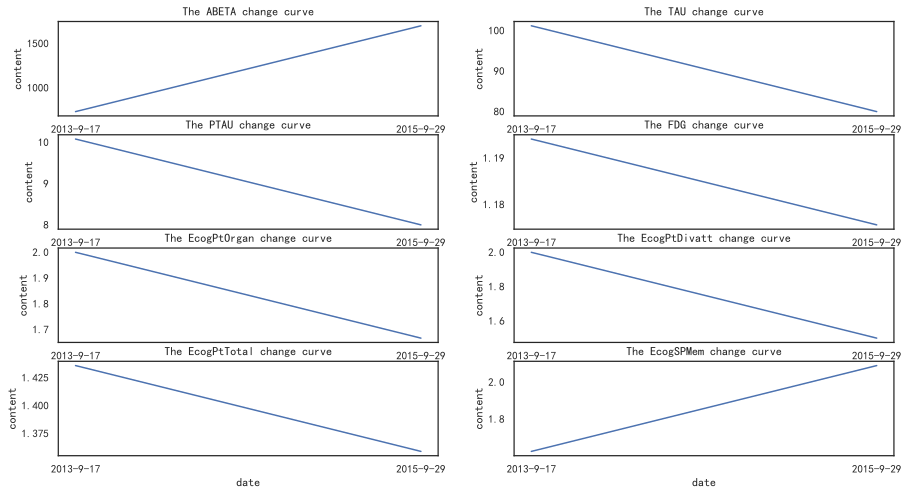

In [484]:
plt.figure(figsize=(15,8))


ax1 = plt.subplot(421)
x = [data7['EXAMDATE_bl'][36],data7['ABETA_bl'][36]]
y = [data7['EXAMDATE'][36],data7['ABETA'][36]]
# sns.regplot(x,y,line_kws={"color":"blue"},scatter_kws={"color":"grey"})

b = [x,y]
a = pd.DataFrame(b)
plt.xlabel('date')
plt.ylabel('content')
plt.title('The ABETA change curve')
sns.lineplot(x=a[0],y = a[1])


ax2 = plt.subplot(422)
x = [data7['EXAMDATE_bl'][36],data7['TAU_bl'][36]]
y = [data7['EXAMDATE'][36],data7['TAU'][36]]
# sns.regplot(x,y,line_kws={"color":"blue"},scatter_kws={"color":"grey"})

b = [x,y]
a = pd.DataFrame(b)
plt.xlabel('date')
plt.ylabel('content')
plt.title('The TAU change curve')
sns.lineplot(x=a[0],y = a[1])

ax3 = plt.subplot(423)
x = [data7['EXAMDATE_bl'][36],data7['PTAU_bl'][36]]
y = [data7['EXAMDATE'][36],data7['PTAU'][36]]
# sns.regplot(x,y,line_kws={"color":"blue"},scatter_kws={"color":"grey"})

b = [x,y]
a = pd.DataFrame(b)
plt.xlabel('date')
plt.ylabel('content')
plt.title('The PTAU change curve')
sns.lineplot(x=a[0],y = a[1])

ax4 = plt.subplot(424)
x = [data7['EXAMDATE_bl'][36],data7['FDG_bl'][36]]
y = [data7['EXAMDATE'][36],data7['FDG'][36]]
# sns.regplot(x,y,line_kws={"color":"blue"},scatter_kws={"color":"grey"})

b = [x,y]
a = pd.DataFrame(b)
plt.xlabel('date')
plt.ylabel('content')
plt.title('The FDG change curve')
sns.lineplot(x=a[0],y = a[1])


ax5 = plt.subplot(425)
x = [data7['EXAMDATE_bl'][36],data7['EcogPtOrgan_bl'][36]]
y = [data7['EXAMDATE'][36],data7['EcogPtOrgan'][36]]
# sns.regplot(x,y,line_kws={"color":"blue"},scatter_kws={"color":"grey"})

b = [x,y]
a = pd.DataFrame(b)
plt.xlabel('date')
plt.ylabel('content')
plt.title('The EcogPtOrgan change curve')
sns.lineplot(x=a[0],y = a[1])

ax6 = plt.subplot(426)
x = [data7['EXAMDATE_bl'][36],data7['EcogPtDivatt_bl'][36]]
y = [data7['EXAMDATE'][36],data7['EcogPtDivatt'][36]]
# sns.regplot(x,y,line_kws={"color":"blue"},scatter_kws={"color":"grey"})

b = [x,y]
a = pd.DataFrame(b)
plt.xlabel('date')
plt.ylabel('content')
plt.title('The EcogPtDivatt change curve')
sns.lineplot(x=a[0],y = a[1])

ax7 = plt.subplot(427)
x = [data7['EXAMDATE_bl'][36],data7['EcogPtTotal_bl'][36]]
y = [data7['EXAMDATE'][36],data7['EcogPtTotal'][36]]
# sns.regplot(x,y,line_kws={"color":"blue"},scatter_kws={"color":"grey"})

b = [x,y]
a = pd.DataFrame(b)
plt.xlabel('date')
plt.ylabel('content')
plt.title('The EcogPtTotal change curve')
sns.lineplot(x=a[0],y = a[1])

ax8 = plt.subplot(428)
x = [data7['EXAMDATE_bl'][36],data7['EcogSPMem_bl'][36]]
y = [data7['EXAMDATE'][36],data7['EcogSPMem'][36]]
# sns.regplot(x,y,line_kws={"color":"blue"},scatter_kws={"color":"grey"})

b = [x,y]
a = pd.DataFrame(b)
plt.xlabel('date')
plt.ylabel('content')
plt.title('The EcogSPMem change curve')
sns.lineplot(x=a[0],y = a[1])

plt.savefig('D:/学习专区/比赛专题/数维杯/2022“ShuWei Cup”_Problem/论文/图表/SMC2.png',transparent=True,dpi=1000)
plt.show()

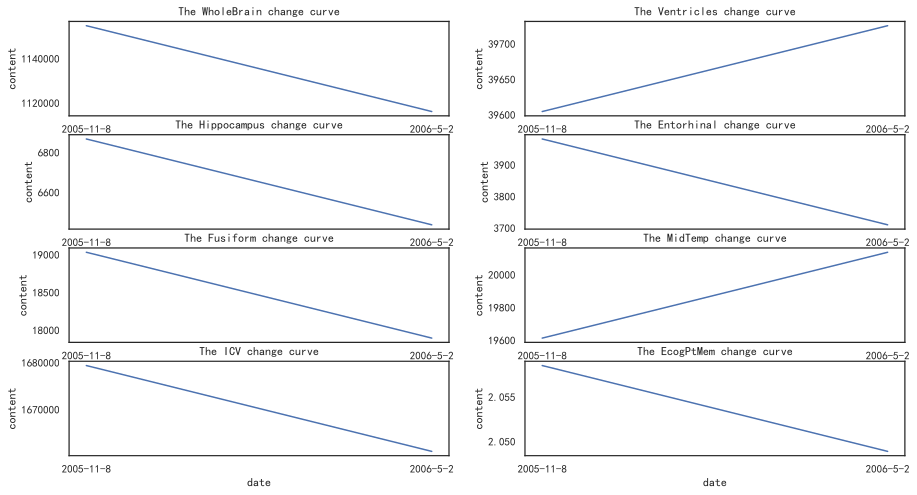

In [485]:
#  对样本中 LMCI 病患的一些生物成分的变化进行分析

#     以 RID=4 的样本 为例 

plt.figure(figsize=(15,8))


ax1 = plt.subplot(421)
x = [data7['EXAMDATE_bl'][3],data7['WholeBrain_bl'][3]]
y = [data7['EXAMDATE'][3],data7['WholeBrain'][3]]
# sns.regplot(x,y,line_kws={"color":"blue"},scatter_kws={"color":"grey"})

b = [x,y]
a = pd.DataFrame(b)
plt.xlabel('date')
plt.ylabel('content')
plt.title('The WholeBrain change curve')
sns.lineplot(x=a[0],y = a[1])


ax2 = plt.subplot(422)
x = [data7['EXAMDATE_bl'][3],data7['Ventricles_bl'][3]]
y = [data7['EXAMDATE'][3],data7['Ventricles'][3]]
# sns.regplot(x,y,line_kws={"color":"blue"},scatter_kws={"color":"grey"})

b = [x,y]
a = pd.DataFrame(b)
plt.xlabel('date')
plt.ylabel('content')
plt.title('The Ventricles change curve')
sns.lineplot(x=a[0],y = a[1])

ax3 = plt.subplot(423)
x = [data7['EXAMDATE_bl'][3],data7['Hippocampus_bl'][3]]
y = [data7['EXAMDATE'][3],data7['Hippocampus'][3]]
# sns.regplot(x,y,line_kws={"color":"blue"},scatter_kws={"color":"grey"})

b = [x,y]
a = pd.DataFrame(b)
plt.xlabel('date')
plt.ylabel('content')
plt.title('The Hippocampus change curve')
sns.lineplot(x=a[0],y = a[1])

ax4 = plt.subplot(424)
x = [data7['EXAMDATE_bl'][3],data7['Entorhinal_bl'][3]]
y = [data7['EXAMDATE'][3],data7['Entorhinal'][3]]
# sns.regplot(x,y,line_kws={"color":"blue"},scatter_kws={"color":"grey"})

b = [x,y]
a = pd.DataFrame(b)
plt.xlabel('date')
plt.ylabel('content')
plt.title('The Entorhinal change curve')
sns.lineplot(x=a[0],y = a[1])


ax5 = plt.subplot(425)
x = [data7['EXAMDATE_bl'][3],data7['Fusiform_bl'][3]]
y = [data7['EXAMDATE'][3],data7['Fusiform'][3]]
# sns.regplot(x,y,line_kws={"color":"blue"},scatter_kws={"color":"grey"})

b = [x,y]
a = pd.DataFrame(b)
plt.xlabel('date')
plt.ylabel('content')
plt.title('The Fusiform change curve')
sns.lineplot(x=a[0],y = a[1])

ax6 = plt.subplot(426)
x = [data7['EXAMDATE_bl'][3],data7['MidTemp_bl'][3]]
y = [data7['EXAMDATE'][3],data7['MidTemp'][3]]
# sns.regplot(x,y,line_kws={"color":"blue"},scatter_kws={"color":"grey"})

b = [x,y]
a = pd.DataFrame(b)
plt.xlabel('date')
plt.ylabel('content')
plt.title('The MidTemp change curve')
sns.lineplot(x=a[0],y = a[1])

ax7 = plt.subplot(427)
x = [data7['EXAMDATE_bl'][3],data7['ICV_bl'][3]]
y = [data7['EXAMDATE'][3],data7['ICV'][3]]
# sns.regplot(x,y,line_kws={"color":"blue"},scatter_kws={"color":"grey"})

b = [x,y]
a = pd.DataFrame(b)
plt.xlabel('date')
plt.ylabel('content')
plt.title('The ICV change curve')
sns.lineplot(x=a[0],y = a[1])

ax8 = plt.subplot(428)
x = [data7['EXAMDATE_bl'][3],data7['EcogPtMem_bl'][3]]
y = [data7['EXAMDATE'][3],data7['EcogPtMem'][3]]
# sns.regplot(x,y,line_kws={"color":"blue"},scatter_kws={"color":"grey"})

b = [x,y]
a = pd.DataFrame(b)
plt.xlabel('date')
plt.ylabel('content')
plt.title('The EcogPtMem change curve')
sns.lineplot(x=a[0],y = a[1])

plt.savefig('D:/学习专区/比赛专题/数维杯/2022“ShuWei Cup”_Problem/论文/图表/LMCI1.png',transparent=True,dpi=1000)
plt.show()

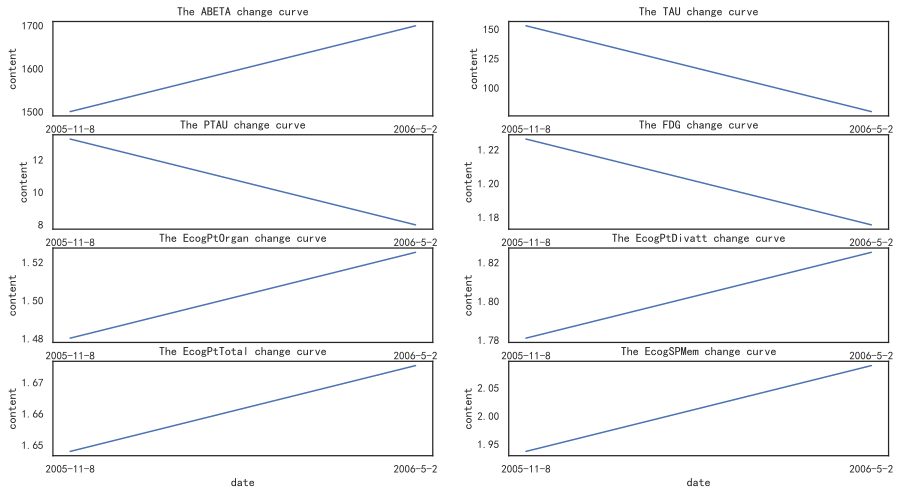

In [486]:
plt.figure(figsize=(15,8))


ax1 = plt.subplot(421)
x = [data7['EXAMDATE_bl'][3],data7['ABETA_bl'][3]]
y = [data7['EXAMDATE'][3],data7['ABETA'][3]]
# sns.regplot(x,y,line_kws={"color":"blue"},scatter_kws={"color":"grey"})

b = [x,y]
a = pd.DataFrame(b)
plt.xlabel('date')
plt.ylabel('content')
plt.title('The ABETA change curve')
sns.lineplot(x=a[0],y = a[1])


ax2 = plt.subplot(422)
x = [data7['EXAMDATE_bl'][3],data7['TAU_bl'][3]]
y = [data7['EXAMDATE'][3],data7['TAU'][3]]
# sns.regplot(x,y,line_kws={"color":"blue"},scatter_kws={"color":"grey"})

b = [x,y]
a = pd.DataFrame(b)
plt.xlabel('date')
plt.ylabel('content')
plt.title('The TAU change curve')
sns.lineplot(x=a[0],y = a[1])

ax3 = plt.subplot(423)
x = [data7['EXAMDATE_bl'][3],data7['PTAU_bl'][3]]
y = [data7['EXAMDATE'][3],data7['PTAU'][3]]
# sns.regplot(x,y,line_kws={"color":"blue"},scatter_kws={"color":"grey"})

b = [x,y]
a = pd.DataFrame(b)
plt.xlabel('date')
plt.ylabel('content')
plt.title('The PTAU change curve')
sns.lineplot(x=a[0],y = a[1])

ax4 = plt.subplot(424)
x = [data7['EXAMDATE_bl'][3],data7['FDG_bl'][3]]
y = [data7['EXAMDATE'][3],data7['FDG'][3]]
# sns.regplot(x,y,line_kws={"color":"blue"},scatter_kws={"color":"grey"})

b = [x,y]
a = pd.DataFrame(b)
plt.xlabel('date')
plt.ylabel('content')
plt.title('The FDG change curve')
sns.lineplot(x=a[0],y = a[1])


ax5 = plt.subplot(425)
x = [data7['EXAMDATE_bl'][3],data7['EcogPtOrgan_bl'][3]]
y = [data7['EXAMDATE'][3],data7['EcogPtOrgan'][3]]
# sns.regplot(x,y,line_kws={"color":"blue"},scatter_kws={"color":"grey"})

b = [x,y]
a = pd.DataFrame(b)
plt.xlabel('date')
plt.ylabel('content')
plt.title('The EcogPtOrgan change curve')
sns.lineplot(x=a[0],y = a[1])

ax6 = plt.subplot(426)
x = [data7['EXAMDATE_bl'][3],data7['EcogPtDivatt_bl'][3]]
y = [data7['EXAMDATE'][3],data7['EcogPtDivatt'][3]]
# sns.regplot(x,y,line_kws={"color":"blue"},scatter_kws={"color":"grey"})

b = [x,y]
a = pd.DataFrame(b)
plt.xlabel('date')
plt.ylabel('content')
plt.title('The EcogPtDivatt change curve')
sns.lineplot(x=a[0],y = a[1])

ax7 = plt.subplot(427)
x = [data7['EXAMDATE_bl'][3],data7['EcogPtTotal_bl'][3]]
y = [data7['EXAMDATE'][3],data7['EcogPtTotal'][3]]
# sns.regplot(x,y,line_kws={"color":"blue"},scatter_kws={"color":"grey"})

b = [x,y]
a = pd.DataFrame(b)
plt.xlabel('date')
plt.ylabel('content')
plt.title('The EcogPtTotal change curve')
sns.lineplot(x=a[0],y = a[1])

ax8 = plt.subplot(428)
x = [data7['EXAMDATE_bl'][3],data7['EcogSPMem_bl'][3]]
y = [data7['EXAMDATE'][3],data7['EcogSPMem'][3]]
# sns.regplot(x,y,line_kws={"color":"blue"},scatter_kws={"color":"grey"})

b = [x,y]
a = pd.DataFrame(b)
plt.xlabel('date')
plt.ylabel('content')
plt.title('The EcogSPMem change curve')
sns.lineplot(x=a[0],y = a[1])

plt.savefig('D:/学习专区/比赛专题/数维杯/2022“ShuWei Cup”_Problem/论文/图表/LMCI2.png',transparent=True,dpi=1000)
plt.show()

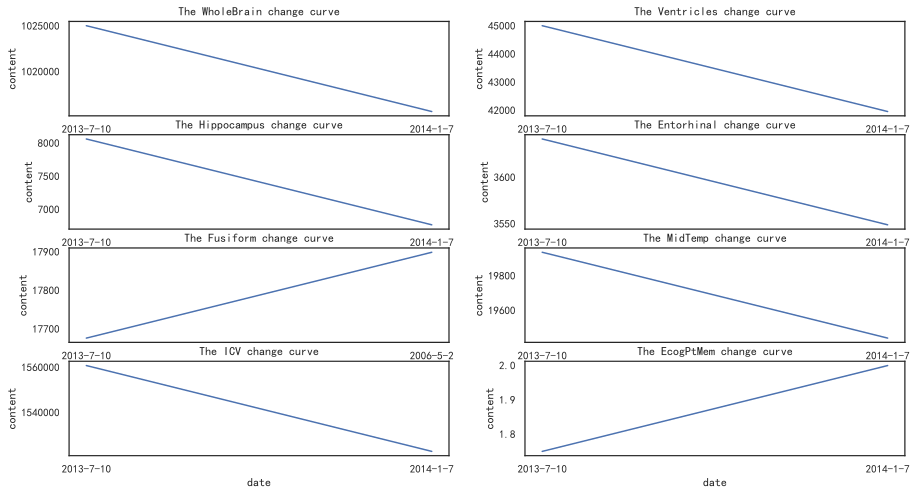

In [500]:
#  对样本中 EMCI 病患的一些生物成分的变化进行分析

#     以 RID=2003 的样本 为例。  该样本由EMCI 转变为 SMC

plt.figure(figsize=(15,8))


ax1 = plt.subplot(421)
x = [data7['EXAMDATE_bl'][2180],data7['WholeBrain_bl'][2180]]
y = [data7['EXAMDATE'][2180],data7['WholeBrain'][2180]]
# sns.regplot(x,y,line_kws={"color":"blue"},scatter_kws={"color":"grey"})

b = [x,y]
a = pd.DataFrame(b)
plt.xlabel('date')
plt.ylabel('content')
plt.title('The WholeBrain change curve')
sns.lineplot(x=a[0],y = a[1])


ax2 = plt.subplot(422)
x = [data7['EXAMDATE_bl'][2180],data7['Ventricles_bl'][2180]]
y = [data7['EXAMDATE'][2180],data7['Ventricles'][2180]]
# sns.regplot(x,y,line_kws={"color":"blue"},scatter_kws={"color":"grey"})

b = [x,y]
a = pd.DataFrame(b)
plt.xlabel('date')
plt.ylabel('content')
plt.title('The Ventricles change curve')
sns.lineplot(x=a[0],y = a[1])

ax3 = plt.subplot(423)
x = [data7['EXAMDATE_bl'][2180],data7['Hippocampus_bl'][2180]]
y = [data7['EXAMDATE'][2180],data7['Hippocampus'][2180]]
# sns.regplot(x,y,line_kws={"color":"blue"},scatter_kws={"color":"grey"})

b = [x,y]
a = pd.DataFrame(b)
plt.xlabel('date')
plt.ylabel('content')
plt.title('The Hippocampus change curve')
sns.lineplot(x=a[0],y = a[1])

ax4 = plt.subplot(424)
x = [data7['EXAMDATE_bl'][2180],data7['Entorhinal_bl'][2180]]
y = [data7['EXAMDATE'][2180],data7['Entorhinal'][2180]]
# sns.regplot(x,y,line_kws={"color":"blue"},scatter_kws={"color":"grey"})

b = [x,y]
a = pd.DataFrame(b)
plt.xlabel('date')
plt.ylabel('content')
plt.title('The Entorhinal change curve')
sns.lineplot(x=a[0],y = a[1])


ax5 = plt.subplot(425)
x = [data7['EXAMDATE_bl'][2180],data7['Fusiform_bl'][2180]]
y = [data7['EXAMDATE'][3],data7['Fusiform'][3]]
# sns.regplot(x,y,line_kws={"color":"blue"},scatter_kws={"color":"grey"})

b = [x,y]
a = pd.DataFrame(b)
plt.xlabel('date')
plt.ylabel('content')
plt.title('The Fusiform change curve')
sns.lineplot(x=a[0],y = a[1])

ax6 = plt.subplot(426)
x = [data7['EXAMDATE_bl'][2180],data7['MidTemp_bl'][2180]]
y = [data7['EXAMDATE'][2180],data7['MidTemp'][2180]]
# sns.regplot(x,y,line_kws={"color":"blue"},scatter_kws={"color":"grey"})

b = [x,y]
a = pd.DataFrame(b)
plt.xlabel('date')
plt.ylabel('content')
plt.title('The MidTemp change curve')
sns.lineplot(x=a[0],y = a[1])

ax7 = plt.subplot(427)
x = [data7['EXAMDATE_bl'][2180],data7['ICV_bl'][2180]]
y = [data7['EXAMDATE'][2180],data7['ICV'][2180]]
# sns.regplot(x,y,line_kws={"color":"blue"},scatter_kws={"color":"grey"})

b = [x,y]
a = pd.DataFrame(b)
plt.xlabel('date')
plt.ylabel('content')
plt.title('The ICV change curve')
sns.lineplot(x=a[0],y = a[1])

ax8 = plt.subplot(428)
x = [data7['EXAMDATE_bl'][2180],data7['EcogPtMem_bl'][2180]]
y = [data7['EXAMDATE'][2180],data7['EcogPtMem'][2180]]
# sns.regplot(x,y,line_kws={"color":"blue"},scatter_kws={"color":"grey"})

b = [x,y]
a = pd.DataFrame(b)
plt.xlabel('date')
plt.ylabel('content')
plt.title('The EcogPtMem change curve')
sns.lineplot(x=a[0],y = a[1])

plt.savefig('D:/学习专区/比赛专题/数维杯/2022“ShuWei Cup”_Problem/论文/图表/EMCI1.png',transparent=True,dpi=1000)
plt.show()

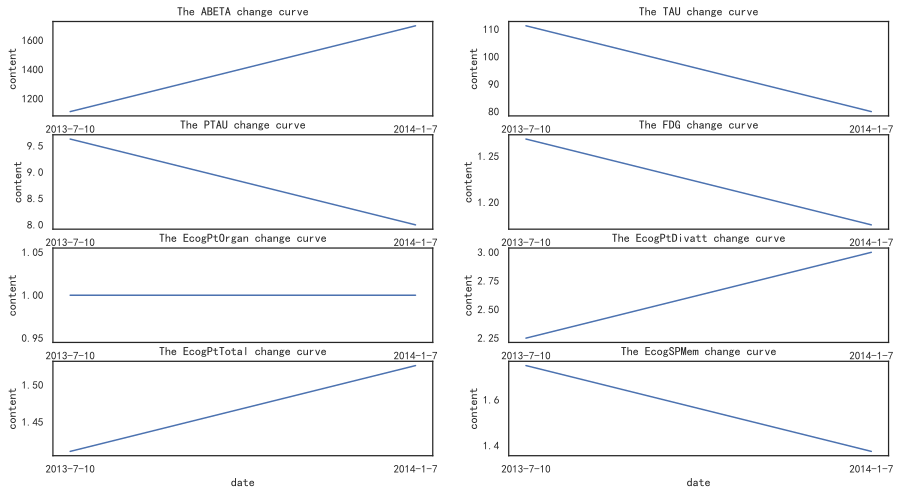

In [501]:
plt.figure(figsize=(15,8))


ax1 = plt.subplot(421)
x = [data7['EXAMDATE_bl'][2180],data7['ABETA_bl'][2180]]
y = [data7['EXAMDATE'][2180],data7['ABETA'][2180]]
# sns.regplot(x,y,line_kws={"color":"blue"},scatter_kws={"color":"grey"})

b = [x,y]
a = pd.DataFrame(b)
plt.xlabel('date')
plt.ylabel('content')
plt.title('The ABETA change curve')
sns.lineplot(x=a[0],y = a[1])


ax2 = plt.subplot(422)
x = [data7['EXAMDATE_bl'][2180],data7['TAU_bl'][2180]]
y = [data7['EXAMDATE'][2180],data7['TAU'][2180]]
# sns.regplot(x,y,line_kws={"color":"blue"},scatter_kws={"color":"grey"})

b = [x,y]
a = pd.DataFrame(b)
plt.xlabel('date')
plt.ylabel('content')
plt.title('The TAU change curve')
sns.lineplot(x=a[0],y = a[1])

ax3 = plt.subplot(423)
x = [data7['EXAMDATE_bl'][2180],data7['PTAU_bl'][2180]]
y = [data7['EXAMDATE'][2180],data7['PTAU'][2180]]
# sns.regplot(x,y,line_kws={"color":"blue"},scatter_kws={"color":"grey"})

b = [x,y]
a = pd.DataFrame(b)
plt.xlabel('date')
plt.ylabel('content')
plt.title('The PTAU change curve')
sns.lineplot(x=a[0],y = a[1])

ax4 = plt.subplot(424)
x = [data7['EXAMDATE_bl'][2180],data7['FDG_bl'][2180]]
y = [data7['EXAMDATE'][2180],data7['FDG'][2180]]
# sns.regplot(x,y,line_kws={"color":"blue"},scatter_kws={"color":"grey"})

b = [x,y]
a = pd.DataFrame(b)
plt.xlabel('date')
plt.ylabel('content')
plt.title('The FDG change curve')
sns.lineplot(x=a[0],y = a[1])


ax5 = plt.subplot(425)
x = [data7['EXAMDATE_bl'][2180],data7['EcogPtOrgan_bl'][2180]]
y = [data7['EXAMDATE'][2180],data7['EcogPtOrgan'][2180]]
# sns.regplot(x,y,line_kws={"color":"blue"},scatter_kws={"color":"grey"})

b = [x,y]
a = pd.DataFrame(b)
plt.xlabel('date')
plt.ylabel('content')
plt.title('The EcogPtOrgan change curve')
sns.lineplot(x=a[0],y = a[1])

ax6 = plt.subplot(426)
x = [data7['EXAMDATE_bl'][2180],data7['EcogPtDivatt_bl'][2180]]
y = [data7['EXAMDATE'][2180],data7['EcogPtDivatt'][2180]]
# sns.regplot(x,y,line_kws={"color":"blue"},scatter_kws={"color":"grey"})

b = [x,y]
a = pd.DataFrame(b)
plt.xlabel('date')
plt.ylabel('content')
plt.title('The EcogPtDivatt change curve')
sns.lineplot(x=a[0],y = a[1])

ax7 = plt.subplot(427)
x = [data7['EXAMDATE_bl'][2180],data7['EcogPtTotal_bl'][2180]]
y = [data7['EXAMDATE'][2180],data7['EcogPtTotal'][2180]]
# sns.regplot(x,y,line_kws={"color":"blue"},scatter_kws={"color":"grey"})

b = [x,y]
a = pd.DataFrame(b)
plt.xlabel('date')
plt.ylabel('content')
plt.title('The EcogPtTotal change curve')
sns.lineplot(x=a[0],y = a[1])

ax8 = plt.subplot(428)
x = [data7['EXAMDATE_bl'][2180],data7['EcogSPMem_bl'][2180]]
y = [data7['EXAMDATE'][2180],data7['EcogSPMem'][2180]]
# sns.regplot(x,y,line_kws={"color":"blue"},scatter_kws={"color":"grey"})

b = [x,y]
a = pd.DataFrame(b)
plt.xlabel('date')
plt.ylabel('content')
plt.title('The EcogSPMem change curve')
sns.lineplot(x=a[0],y = a[1])

plt.savefig('D:/学习专区/比赛专题/数维杯/2022“ShuWei Cup”_Problem/论文/图表/EMCI2.png',transparent=True,dpi=1000)
plt.show()

In [499]:
data7['RID'].head(2181)

0          3
1          3
2          3
3          4
4          4
        ... 
2176    5202
2177    1430
2178    2002
2179    5200
2180    5200
Name: RID, Length: 2181, dtype: int64